In [4]:
%display None

In [198]:
from sage.combinat.q_analogues import q_factorial

In [235]:
(q^n-1)^(n-1)

3375

In [201]:
q^(binomial(n,2))*q_factorial(3,2)

168

In [206]:
from itertools import product
from itertools import combinations
from itertools import permutations
from collections import defaultdict
import time
import sage.graphs.graph_plot

In [223]:
n=4
q = 2
#FF = GF(9,'c')
FF = GF(q)
so = FF.cardinality()^n-1
thm = (FF.cardinality()^n-1)^(n-1)
mult = (q-1)^(n-1)*(add([q^i for i in range(n)])^(n-2))
G = GL(n, FF)
M = MatrixSpace(FF,n,n)
V = VectorSpace(FF,n)
num_fact = (q^n-1)^(n-1)
nq=gaussian_binomial(n,1,q=q)

def get_hyperplanes(): #generate all hyperplanes of gl(n,q)
    H = []
    for i in range(n):
        h = matrix(FF,n-1,n)
        for j in range(n):
            if j<i:
                h[j,j] = 1
            if j>i:
                h[j-1,j] = 1
        if i >0:
            comblist = [p for p in product(GF(q), repeat=i)]
            num = len(comblist)
            for k in range(num):
                b = h
                v = comblist[k]
                for l in range(i):
                    b[l,i] = v[l]
                H.append(copy(b))
        else: H.append(h)
    return H

def find_hyperplane(g):
    M = g.matrix() - (G[0]**0)
    m = kernel(M)
    return m
    
def is_reflection(g):
    n = G.degree()
    M = g.matrix() - (G[0]**0).matrix()
    KM = M.kernel()
    return KM.dimension() == n-1

def is_transvection(g):
    return is_reflection(g) and M(g).determinant() == 1


def get_transvections():
    R = []
    for g in G:
        if is_transvection(g):
            R.append(g)
    return R

def get_refls():
    R = []
    for g in G:
        if is_reflection(g):
            R.append(g)
    return R

def get_refls_w_hyp():
    R_h = []
    for g in G:
        if is_reflection(g):
            R_h.append([g, find_hyperplane(g)])
    return R_h

def get_singer(): #find all singer cycles in a list
    S = []
    for g in G:
        if g.multiplicative_order() == so:
            S.append(g)
    return S

def get_reg_ells():
    S = []
    #D = defaultdict(int)
    #D2 = defaultdict(tuple)
    for g in G:
        A = M(g)
        cp = A.charpoly()
        if cp.is_irreducible():
            #D[cp] += 1
            #D2[cp] += (g,)
            S.append(g)
    return S

def sing_with_det(alp):
    c1=[]
    for c in L:
        if c.matrix().determinant() == alp:
            c1.append(c)
    return c1

def insert_row(M,k,row):
    return matrix(FF,M.rows()[:k]+[row]+M.rows()[k:])

def get_reg_ells():
    S = []
    D = defaultdict(int)
    D2 = defaultdict(tuple)
    for g in G:
        A = M(g)
        cp = A.charpoly()
        if cp.is_irreducible():
            D[cp] += 1
            D2[cp] += (g,)
            S.append(g)
    return S, D, D2
def get_fact(R,c):
    F = []
    for i in product(range(len(R)),repeat = G.degree()):
        if mul([R[i[k]] for k in range(G.degree())]) == c:
            F.append([R[i[k]] for k in range(G.degree())])
    return F

def get_fact_faster(R,c):
    F = []
    for i in product(range(len(R)),repeat = G.degree()-1):
        m = c*mul([R[i[k]] for k in range(G.degree()-1)]).inverse()
        if is_reflection(m):
            F.append([R[i[k]] for k in range(G.degree()-1)] + [m,])
    return F



#generate 1-dim vectors
def get_v1():
    H=get_hyperplanes()
    vec=[]
    for h in H:
        m=transpose(matrix(FF,h))
        v=kernel(m)
        vec.append(v)
    return vec

In [224]:
def valid_hyps(n,q):
    valid_hyps = []
    H = get_hyperplanes()
    for h_s in combinations(H,n):
        prev = h_s[0]
        for i in range(n-1):
            sub = V.subspace(h_s[i+1]).intersection(V.subspace(prev))
            prev = sub
        if sub.dimension() == 0:
            valid_hyps.append(h_s)
    return valid_hyps

In [226]:
H= get_hyperplanes()
R = get_refls()
#Categoraize all reflections by its hyperplanes that it fixes
hyp_of_ref = {}
for r in R:
    hyp_of_ref[r] = find_hyperplane(r)

In [230]:
#input: hyperplane, output: all reflections that fixes that hyperplane
all_refls_with_hyp = {}
for h in H:
    refl = [k for k, v in hyp_of_ref.items() if v == V.subspace(h)]
    all_refls_with_hyp[H.index(h)] = refl

In [229]:
S = get_singer()
S[0]

[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[1 1 0 0]

In [231]:
all_valid_hyps = valid_hyps(n,q)

In [232]:
fact = []
for h_s in all_valid_hyps:
    ind_0 = [H.index(h) for h in h_s]
    for ind in permutations(ind_0):
        r1 = all_refls_with_hyp[ind[0]]
        r2 = all_refls_with_hyp[ind[1]]
        r3 = all_refls_with_hyp[ind[2]]
        r4 = all_refls_with_hyp[ind[3]]
        for test in product(r1,r2,r3,r4):
            if matrix(FF,prod(test)) == S[0]:
                fact.append(test)
    print(all_valid_hyps.index(h_s))
len(fact)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

3375

In [256]:
newfact = []
for rr in fact:
    newfact.append([m.list() for m in rr])

In [257]:
newfact[0]

[[[1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
 [[1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 1, 1], [0, 0, 0, 1]],
 [[1, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 1]],
 [[1, 0, 0, 0], [1, 0, 0, 1], [1, 1, 1, 1], [1, 1, 0, 0]]]

In [258]:
f = open("facts_4_2_pythonreadable.txt", "w")
f.write(str(newfact))
f.close()

In [245]:
f = open("facts_4_2.txt", "r")
test = f.read()

In [288]:
id = matrix(FF, [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [279]:
prod(fact[0])

[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[1 1 0 0]

In [294]:
str(id)

'[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 0 1]'

In [297]:
elements = set()
covers = set()
for rr in fact:
    it = id
    for i in range(4):
        ele = it * rr[i]
        cover = tuple([str(it), str(ele)])
        it = ele
        #print(ele)
        elements.add(str(ele))
        covers.add(cover)
elements.add(str(id))

    

In [296]:
len(elements)

362

In [301]:
list(covers)[0]

('[1 0 0 1]\n[0 1 0 1]\n[0 0 1 0]\n[0 0 0 1]',
 '[1 0 0 1]\n[0 1 0 1]\n[0 1 1 0]\n[0 0 0 1]')

In [304]:
ultimate_poset = Poset([list(elements), list(covers)], cover_relations = True)

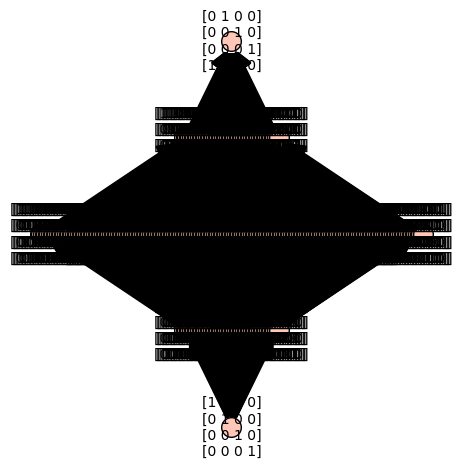

In [306]:
ultimate_poset.show()

In [307]:
ultimate_poset.is_lattice()

False

In [308]:
ultimate_poset.is_self_dual()

True

In [310]:
sadness = ultimate_poset.level_sets()[1] 

In [313]:
for ele1 in sadness:
    for ele2 in sadness:
        print((ultimate_poset.join(ele1, ele2), ele1, ele2))

('[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]')
(None, '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 1 0 1]')
(None, '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[1 0 0 1]')
(None, '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[1 1 1 1]')
('[1 0 0 0]\n[0 1 0 0]\n[0 1 1 1]\n[0 1 1 0]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 1 0 1]\n[0 1 1 0]')
(None, '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 1 1 0]\n[0 0 0 1]')
('[1 0 0 0]\n[0 1 0 0]\n[0 1 1 1]\n[0 1 1 0]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 1 0 0]\n[0 1 1 1]\n[0 0 0 1]')
(None, '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 1]', '[1 0 0 0]\n[0 0 0 1]\n[0 0 1 0]\n[0 1 0 0]')
('[1 0 0 0]\n[0 1 0 0]\n[1 0 1 1]\n[1 0 1 0]', '[1 0 0 0]\n[0 1 0 0]\n[0 0 1 0]\n[0 0 1 

In [ ]:
for r1 in R:
    for h in H:
        if (V.subspace(h).intersect(find_hyperplane(r1))).dimension() < n-1:
            for r2 in all_refls_with_hyp()

In [65]:
emp =find_hyperplane(F[0][2]).intersection(find_hyperplane(F[0][0]).intersection(find_hyperplane(F[0][1])))

In [57]:
R = get_refls()

In [46]:
#Set up
R_and_hyp = get_refls_w_hyp()
H=get_hyperplanes()
S = get_singer()

In [40]:
R_and_hyp

[[
[1 0 0]
[0 1 0]
[1 0 1],

Vector space of degree 3 and dimension 2 over Finite Field of size 2
Basis matrix:                                                       
[1 0 0]                                                             
[0 1 0]                                                             
],
 [
[1 1 0]
[0 1 0]
[0 1 1],

Vector space of degree 3 and dimension 2 over Finite Field of size 2
Basis matrix:                                                       
[1 0 1]                                                             
[0 1 0]                                                             
],
 [
[1 0 0]
[1 0 1]
[1 1 0],

Vector space of degree 3 and dimension 2 over Finite Field of size 2
Basis matrix:                                                       
[1 0 0]                                                             
[0 1 1]                                                             
],
 [
[1 1 0]
[0 1 0]
[0 0 1],

Vector space of degree 3 and dimension 2 over F

In [8]:
len(R)

105

In [5]:
#Brute force calculation to obtain all factorization for a FIXED singer cycle c
#kind of slow, even for q=1
c=S[0]
#get_fact(R,S[0])

Another way to study the case of GL(n,q) is to study the factorization of singer cycles of the same conjugacy class. For a fixed conjugacy class of a Singer cycle, we fix a sequence of valid hyperplanes (the sequence of hyperplanes that are linearly independent and also span the entire space). The easist set up is let such $H_1$, $H_2$, and $H_3$ be $H_i = \mathrm{span}(\hat{e}_i)$. Then it is very easy to generate all reflections that fixes $H_i$ because we just need to compute one row. Then the number of brute force calculation we need to go through to generate all factorizations reduces significantly.

In [6]:
#Building the sequence of standard valid H's
def valid_H_standard(n,q):
    FF = GF(q)
    V = VectorSpace(FF,n)
    valid_H = []
    for i in range(n):
        e_s= [e for e in V.basis()]
        del e_s[i]
        valid_H.append(matrix(FF, e_s))
    return valid_H


In [7]:
#Build all refelction elements
#input the sequence of desired determinants - for q=2 case, it's just 1's.
#Outputs a list of reflection sequences with chosen determinants
#Note that these are just all possible reflection combos given the desired determinant sequence 
#- still need to test if it is a factorization
def invertible_vi(n,q,dlist):
    FF = GF(q)
    #First build all possible vectors, in a form of a single matrix
    Vm =[]
    comblist = list(product(list(product(GF(q), repeat = n-1)), repeat = n))
    for comb in comblist:
        m = matrix(FF,n)
        for i in range(n):
            v = list(comb[i])
            v.insert(i,dlist[i])
            m[i] = v
        Vm.append(m)

    #Then inserting these rows into the hyperplanes to build the reflection sequences
    Hlist = valid_H_standard(n,q)
    allv = []
    for v_s in Vm:
        Rlist = []
        for i in range(n):
            v=vector(v_s[i,:])
            tab = insert_row(Hlist[i],i,v)
            ref = matrix(FF, tab)
            Rlist.append(ref)
        allv.append(Rlist)
    return allv

#Now testing each of those reflection sequences to see if it is indeed a factorization
#Insert n,q, dets, Singer

def get_fact_conj(n,q, dlist,c):
    fact = []
    allv = invertible_vi(n,q,dlist)
    for r in allv:
        test = prod(r)
        f_test= matrix(test).charpoly()
        c_conj= matrix(c).charpoly()
        if f_test == c_conj:
            fact.append(r)
    return fact


In [8]:
#Choose a Singer cycle and check its conjugacy class
c = S[0]
matrix(c).charpoly()

x^4 + x + 1

In [9]:
#Get all factorizations of the kinds with the standard valid hyperplanes of such conjugacy class
#For q=2, our determinants will always just be 1's
dlist = [1]*n
fact_fixed_conj = get_fact_conj(n,q,dlist,c)

In [10]:
#fun fact + sanity check, this should be (q-1)^(n-1)x[n]^(n-2)
len(fact_fixed_conj) == nq^(n-2)

True

In [11]:
# conju=[]
# for c in reg:
#     f=c.charpoly()
#     if f not in conju:
#         conju.append(f)
# conju

Building the graph out of these factorizations

In [12]:
vec=get_v1()
#newvec=[vec[3],vec[1],vec[4],vec[0],vec[-2],vec[2],vec[-1]]
newvec=vec

label = []
for v in newvec:
    v1=v.basis()
    label.append(v1)
vertex={}
for v in range(nq):
    vertex[v]=str(label[v][0])

def get_edge(r):
    edge=[]
    for v in newvec:
            w = v*r
            if v!=w:
                edge.append([newvec.index(v),newvec.index(w)])
    return edge

#input a factorzation [r1,r2,r3]
def get_edges(rrr):
    edges=[]
    for i in range(n):
        edge=get_edge(rrr[i])
        edges.append(edge)
    return edges

#n_q x n_q matrix, put 1 for each edge correspondnce to build the adjacency matrix for each r_i
def adj_matrix(edge):
    M=matrix(nq)
    for e in edge:
        M[e[0],e[1]]=1
    return M

def get_adj_matrix(rrr):
    edges=get_edges(rrr)
    Mlist=[]
    for i in range(n):
        M2=matrix(nq)
        for e in edges[i]:
            M2[e[0],e[1]]=1
        Mlist.append(M2)
    return Mlist

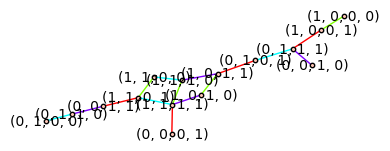

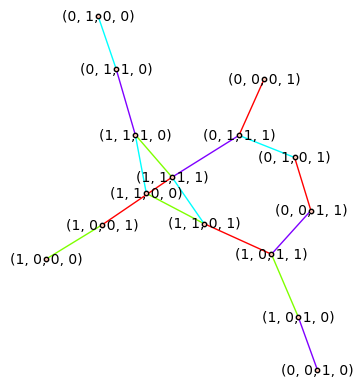

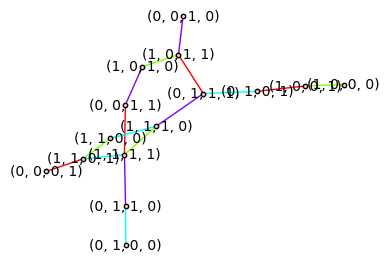

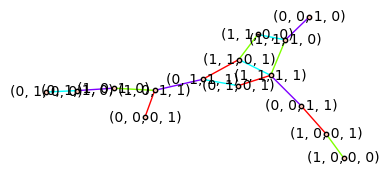

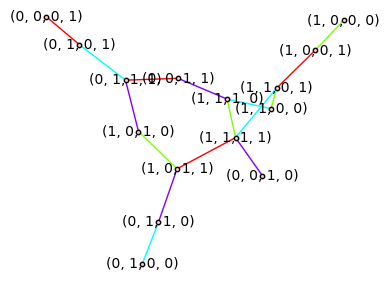

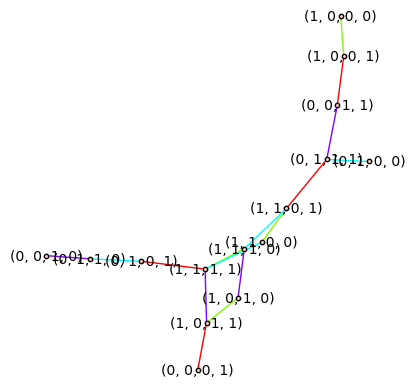

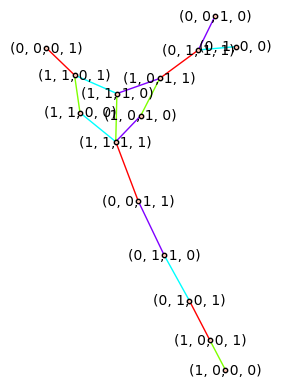

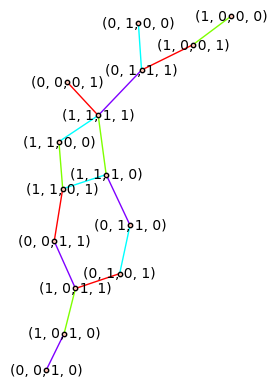

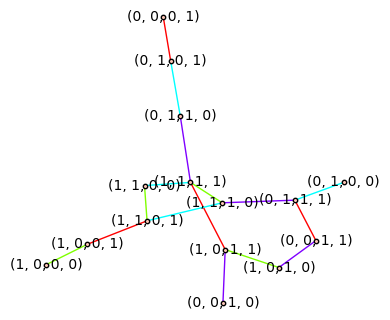

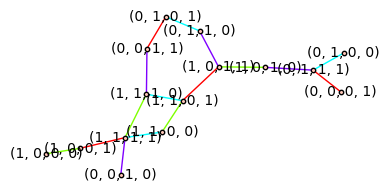

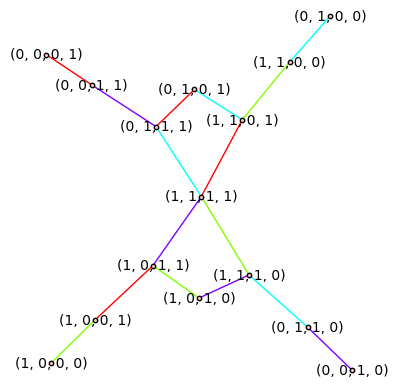

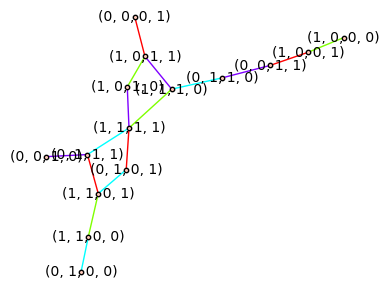

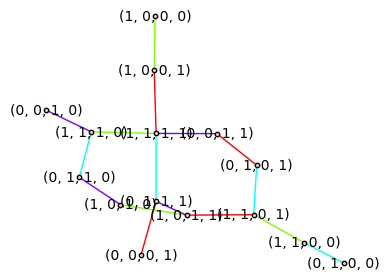

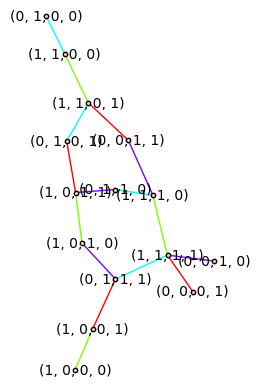

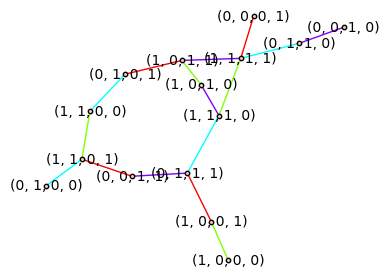

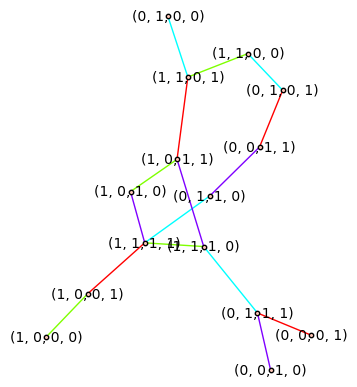

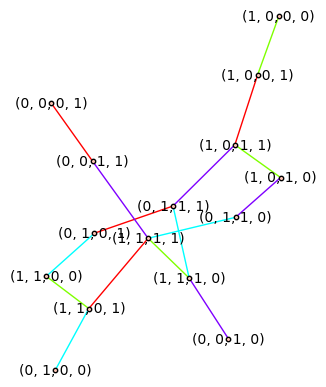

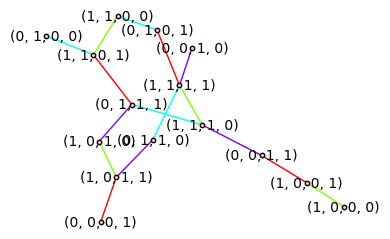

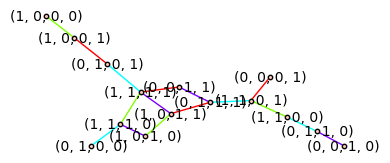

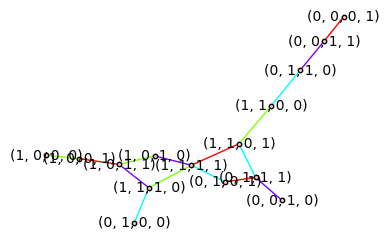

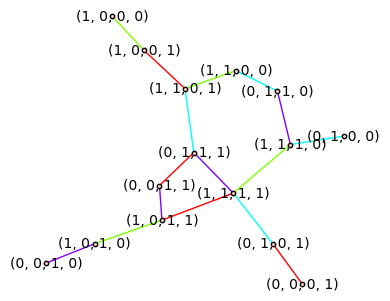

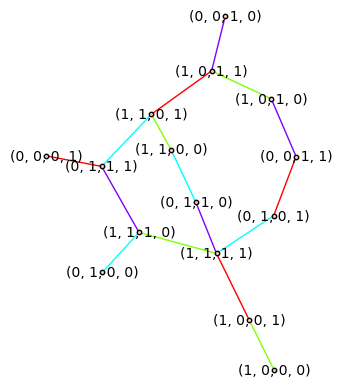

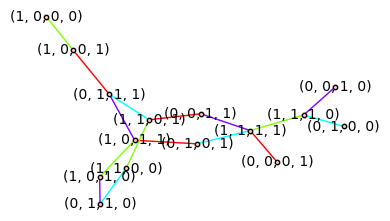

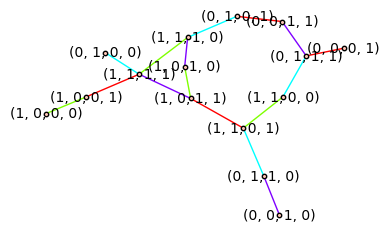

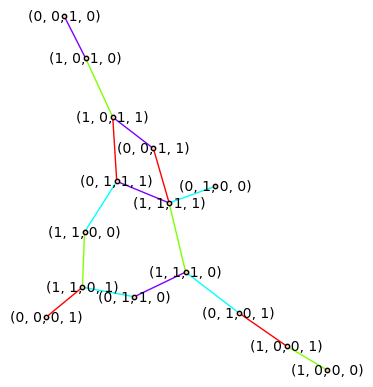

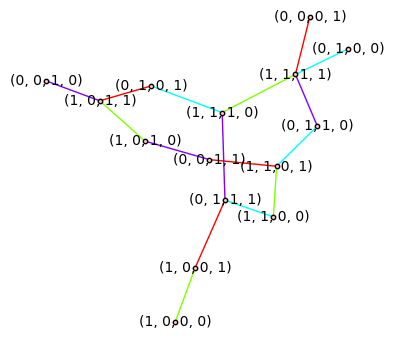

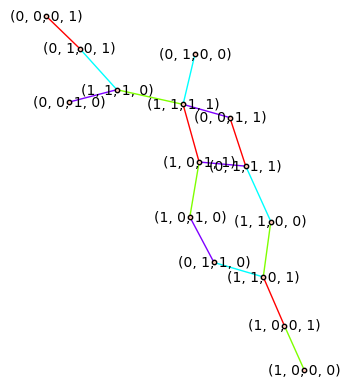

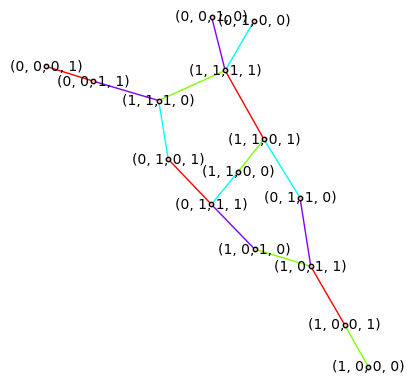

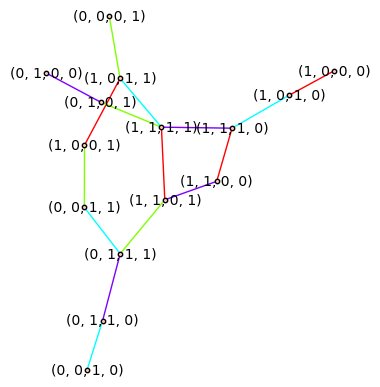

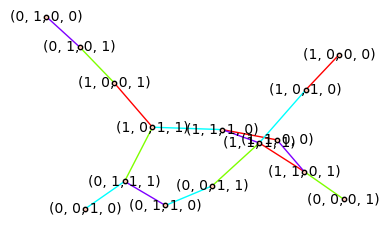

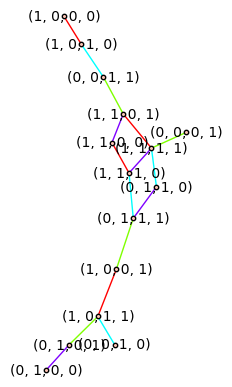

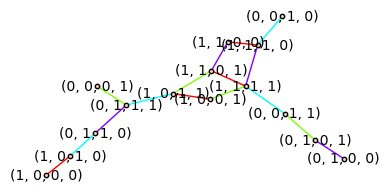

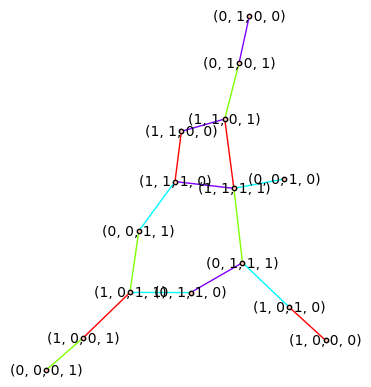

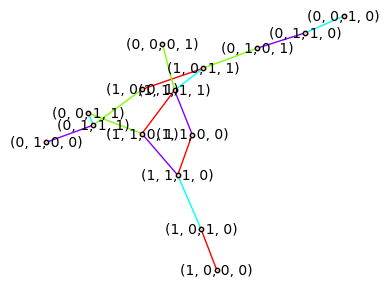

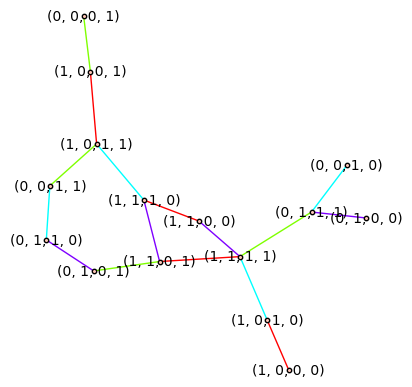

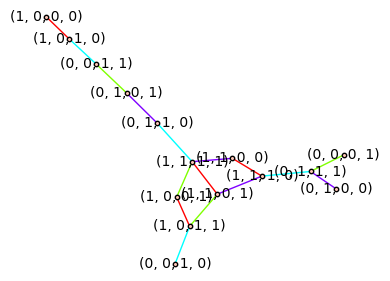

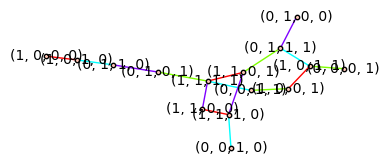

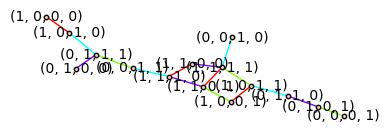

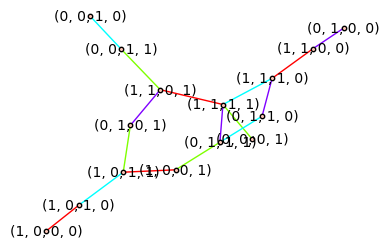

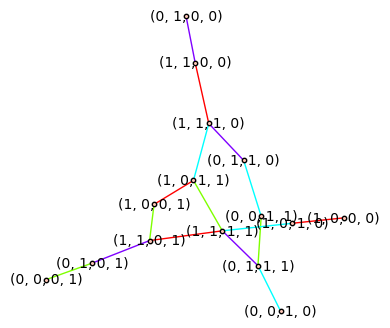

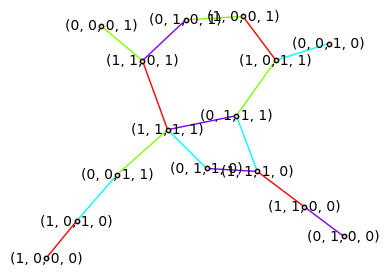

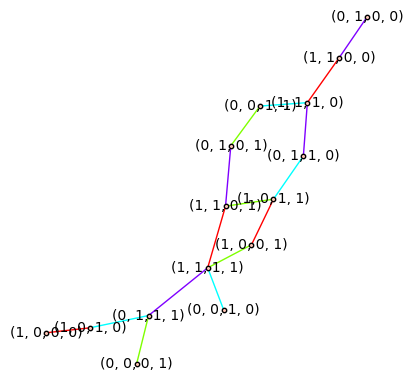

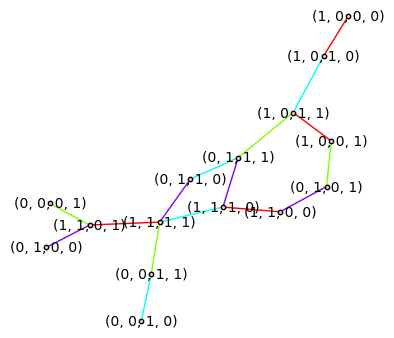

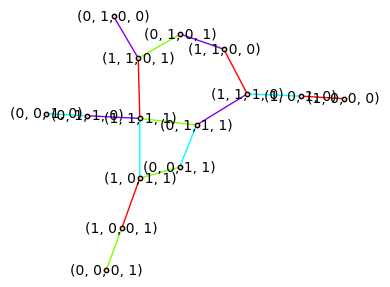

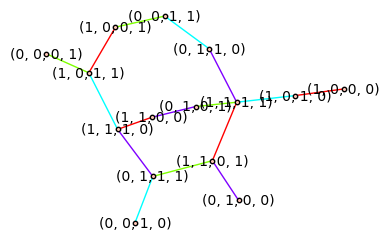

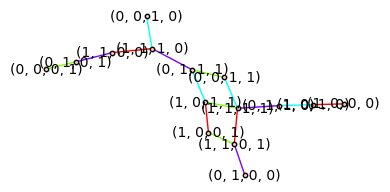

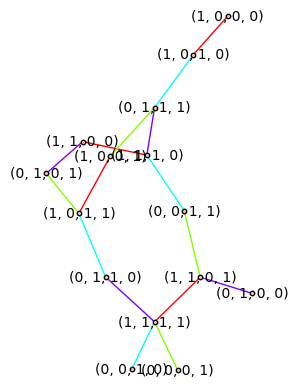

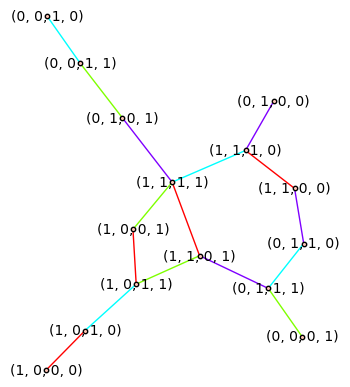

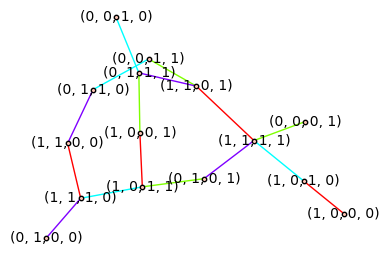

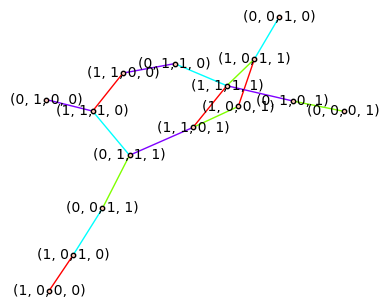

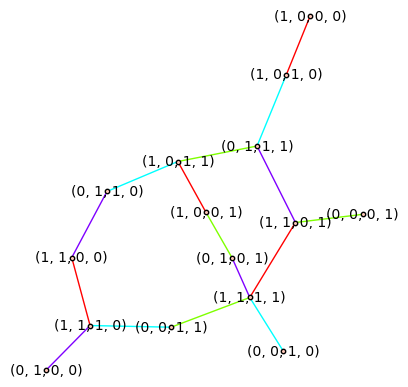

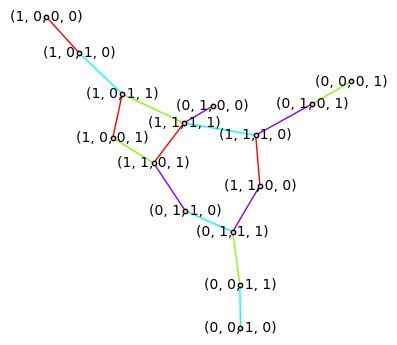

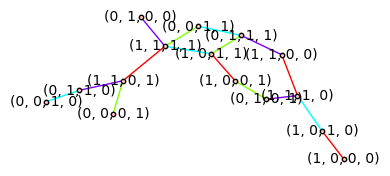

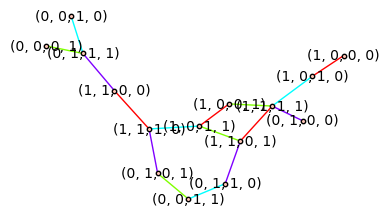

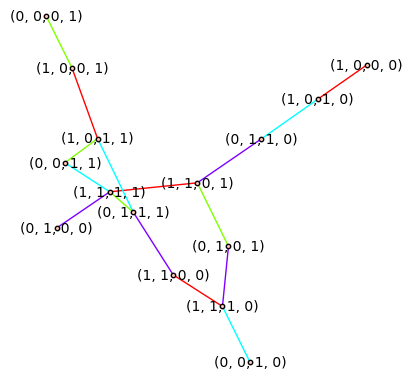

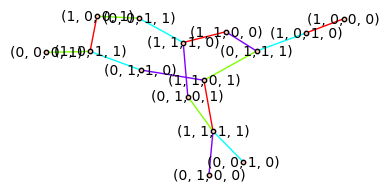

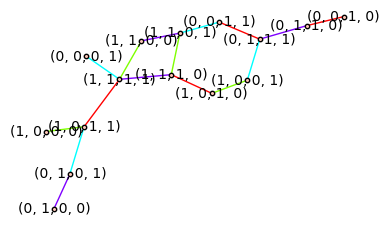

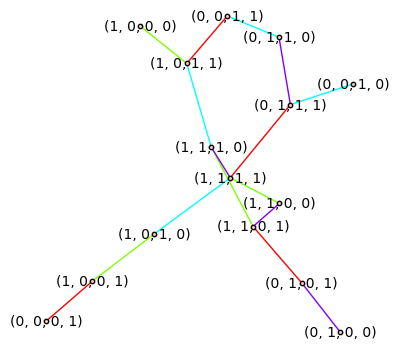

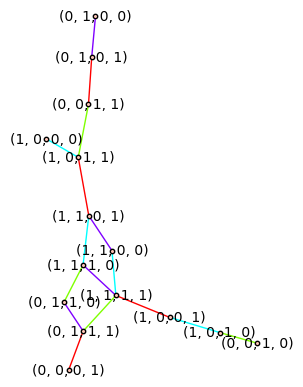

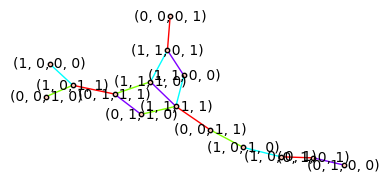

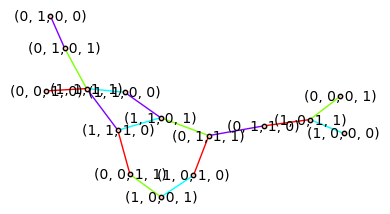

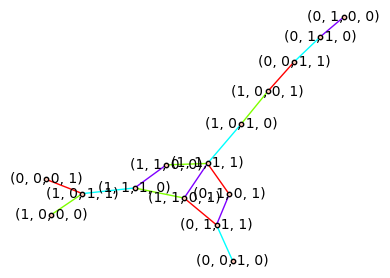

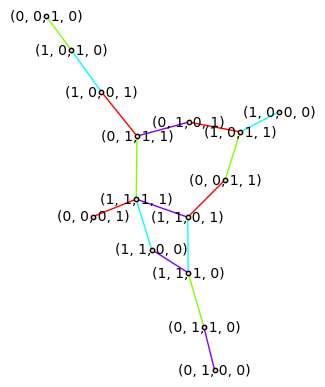

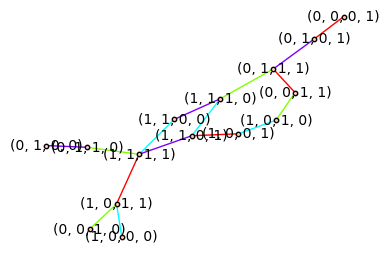

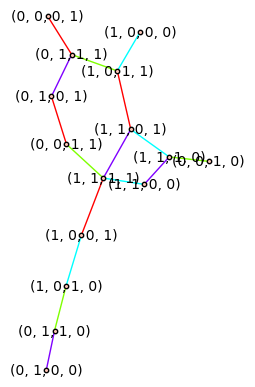

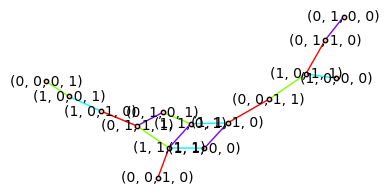

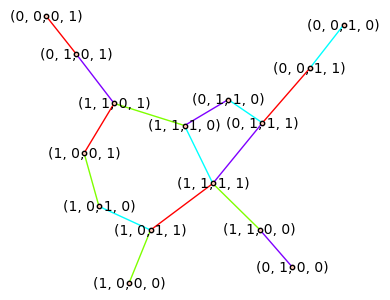

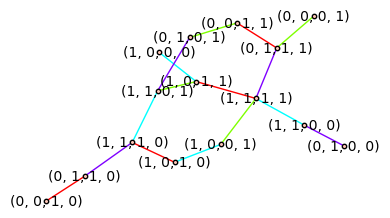

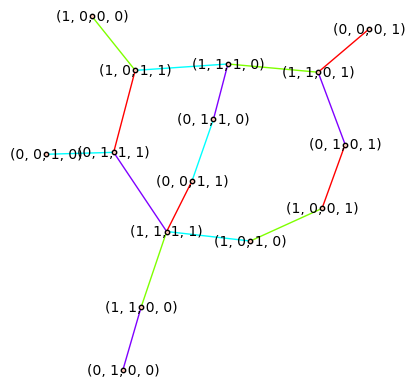

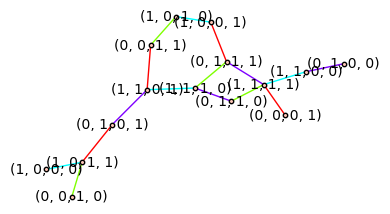

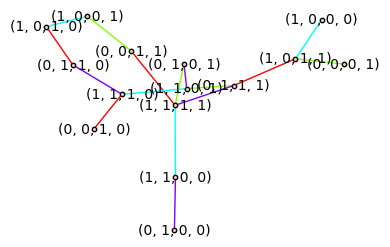

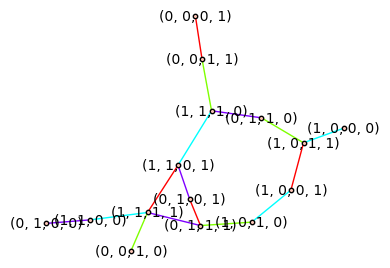

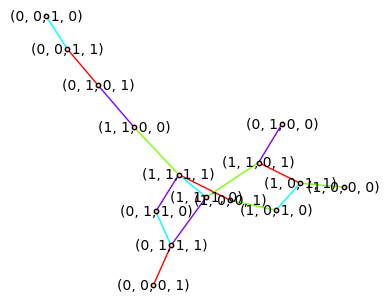

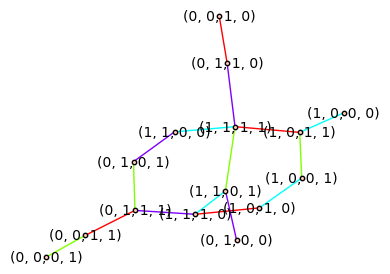

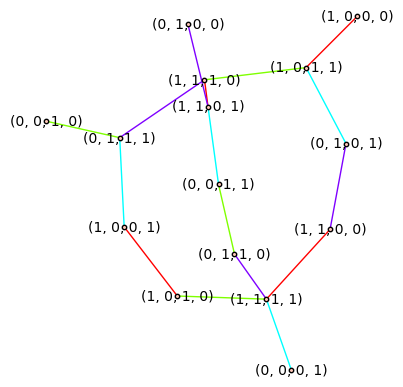

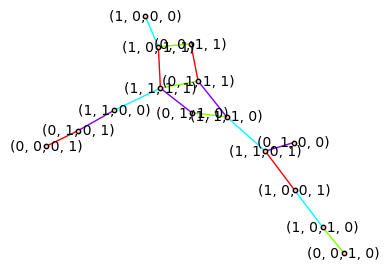

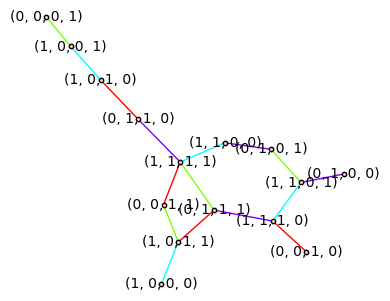

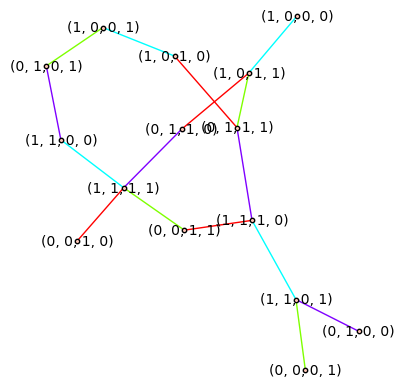

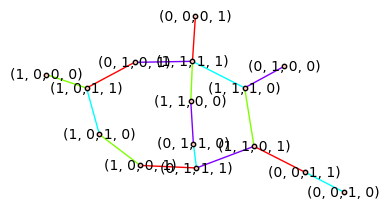

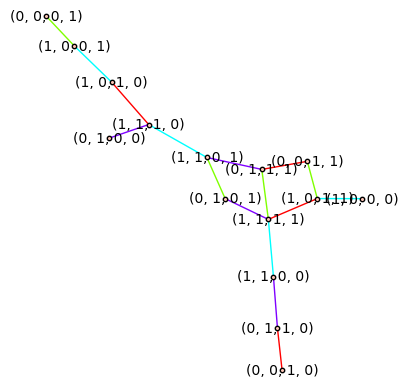

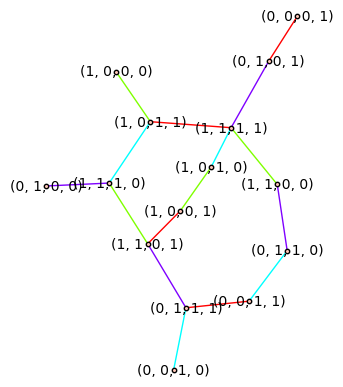

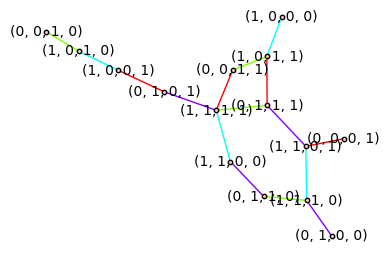

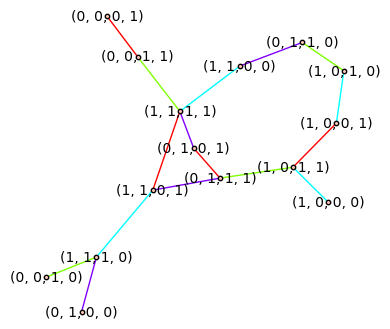

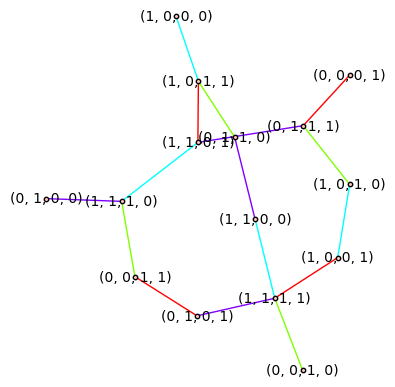

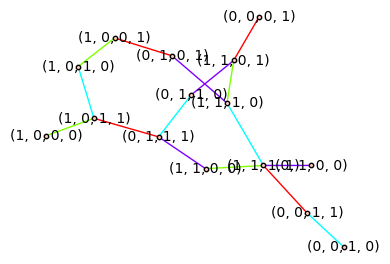

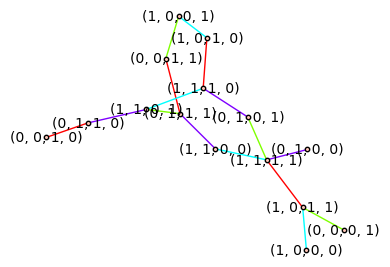

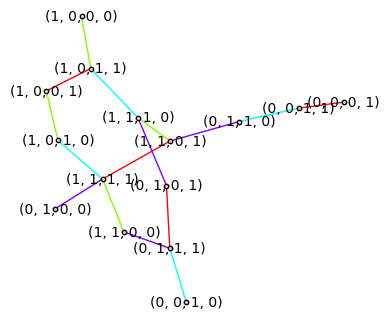

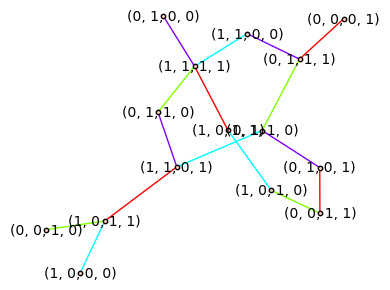

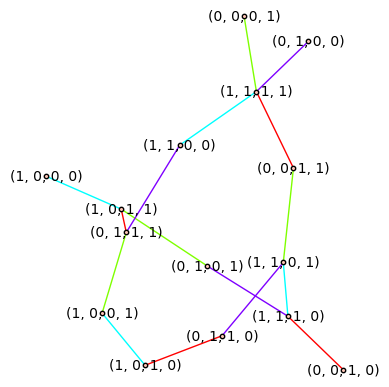

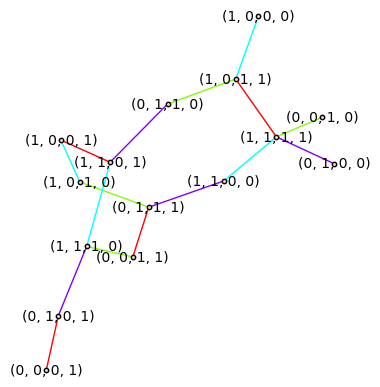

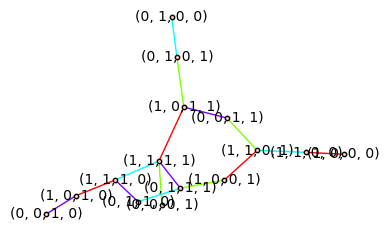

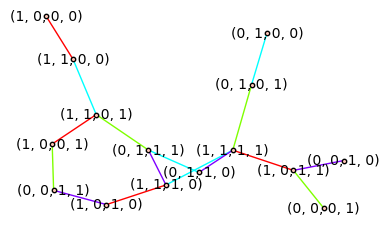

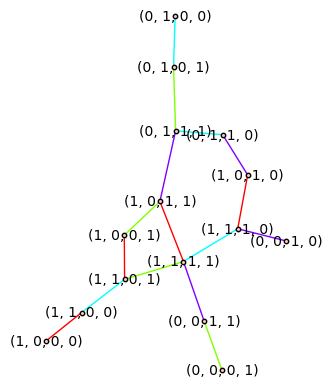

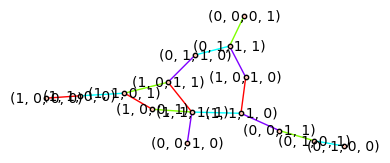

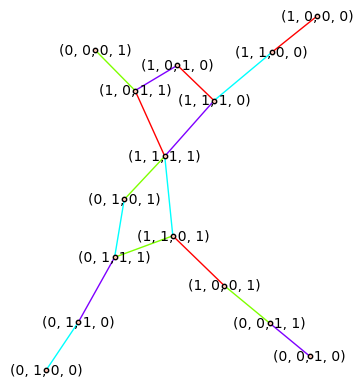

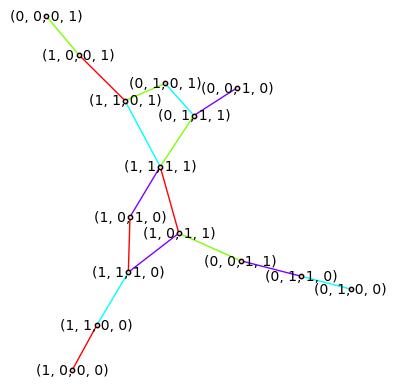

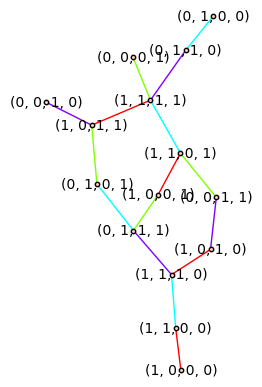

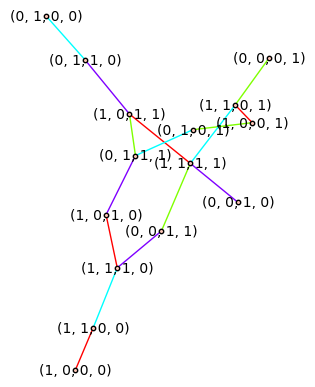

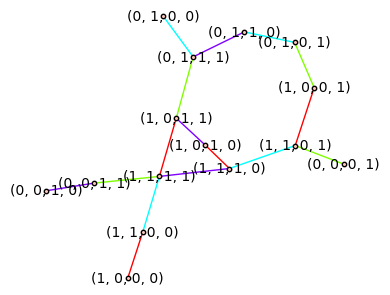

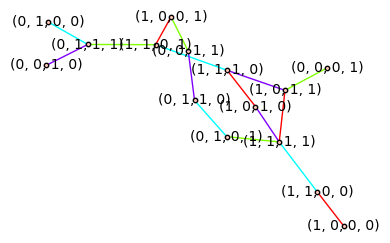

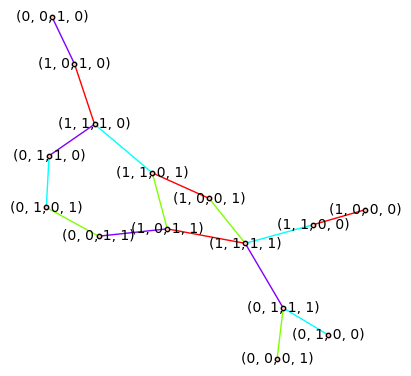

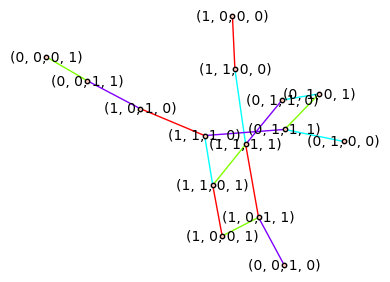

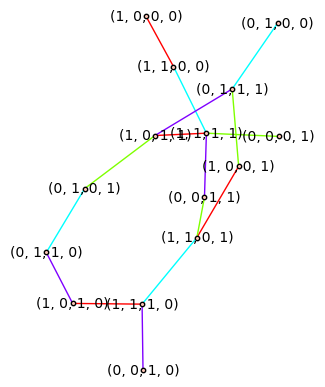

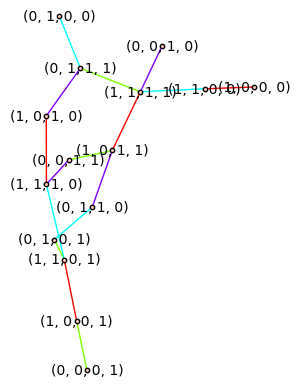

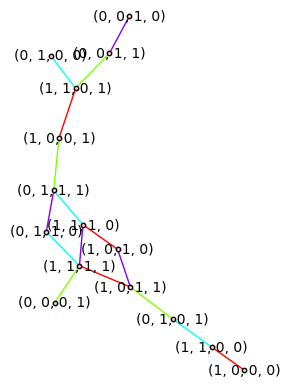

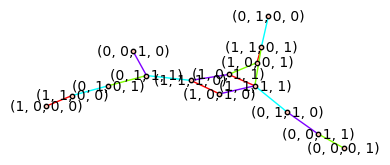

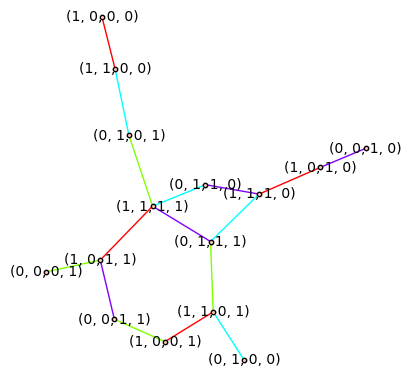

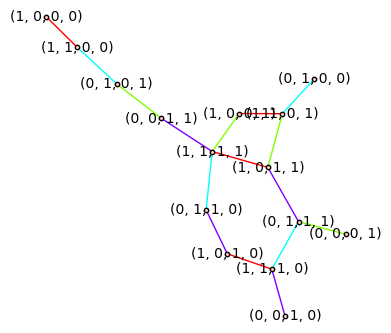

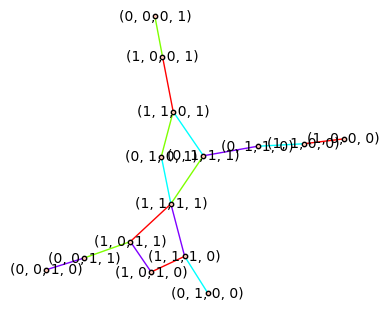

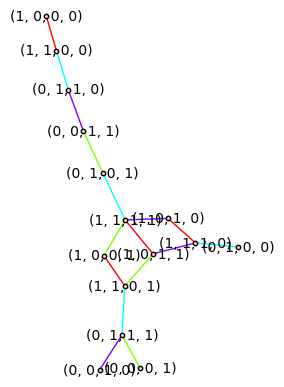

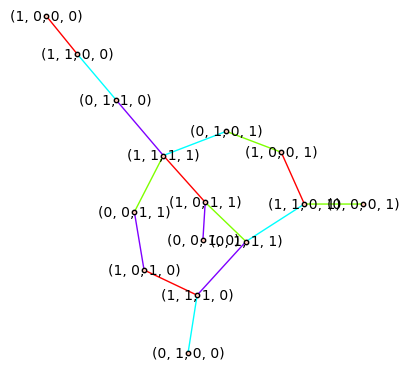

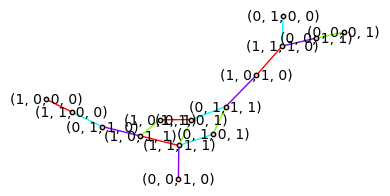

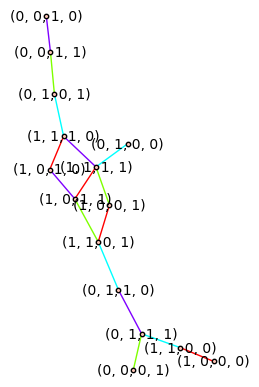

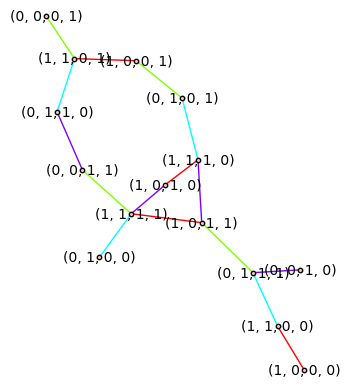

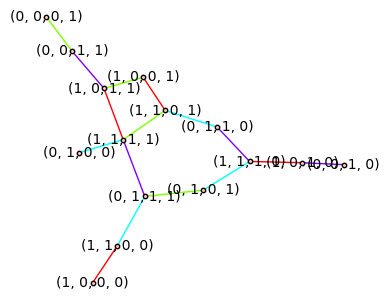

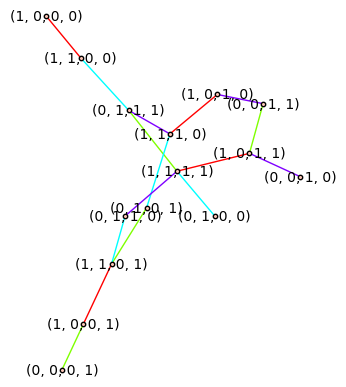

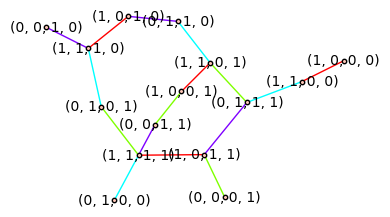

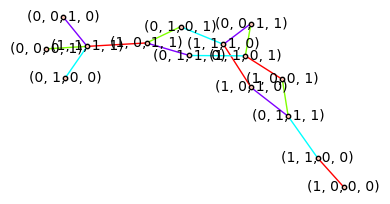

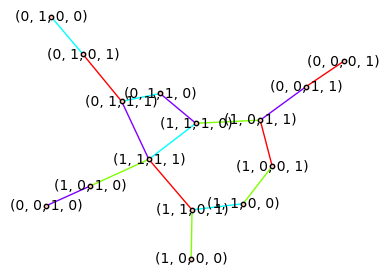

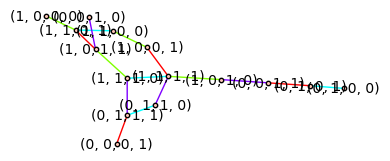

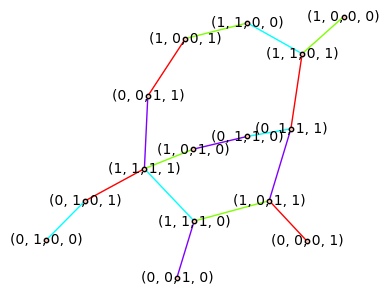

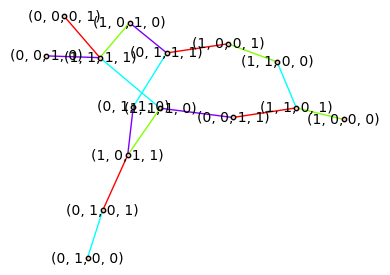

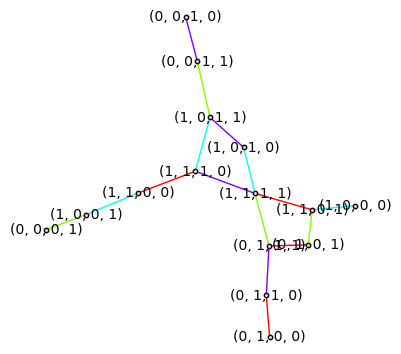

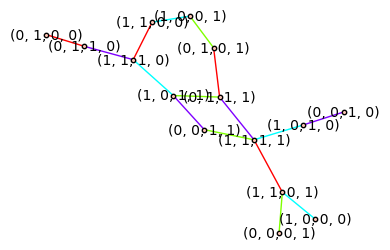

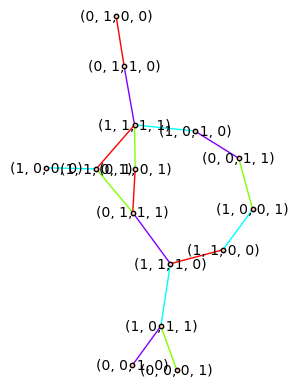

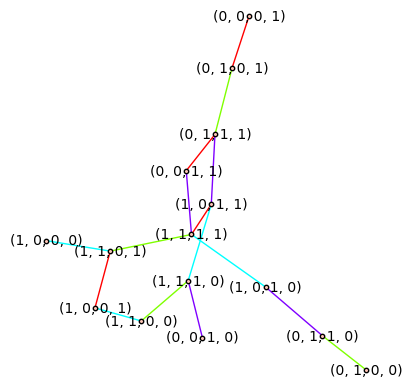

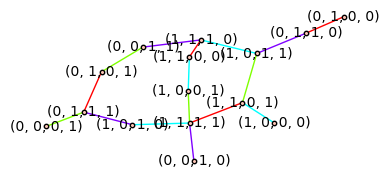

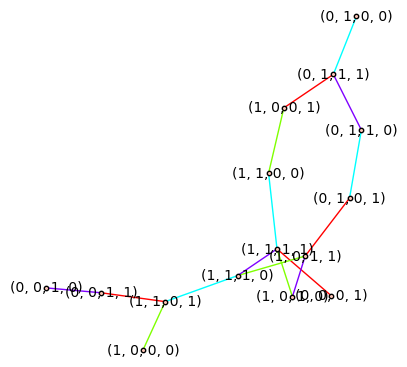

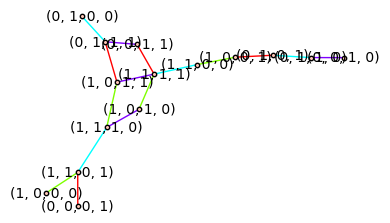

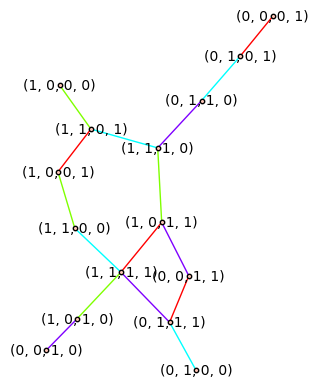

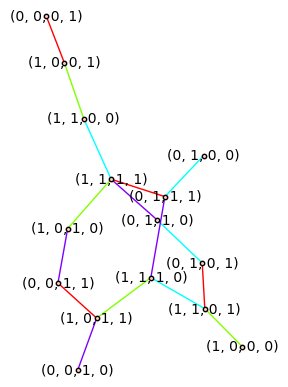

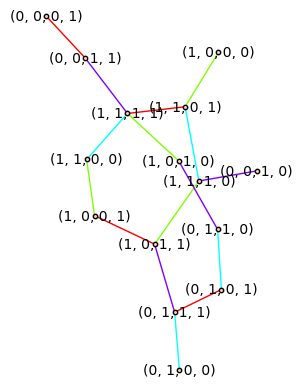

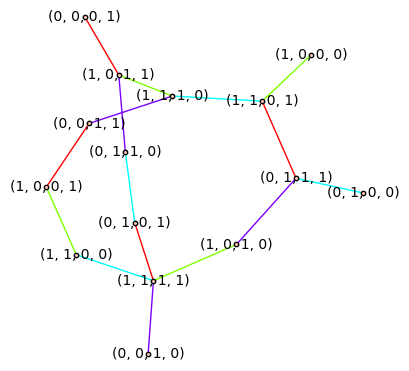

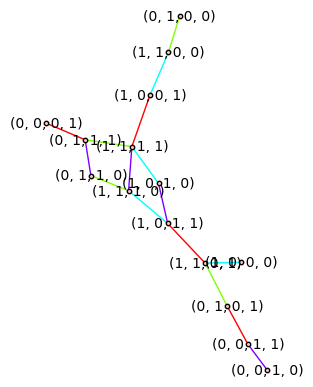

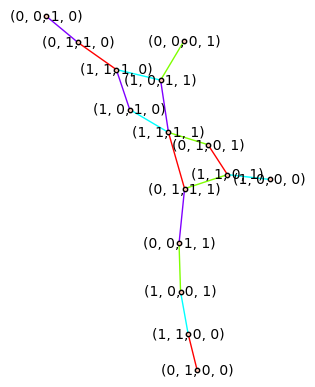

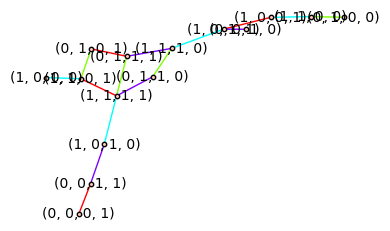

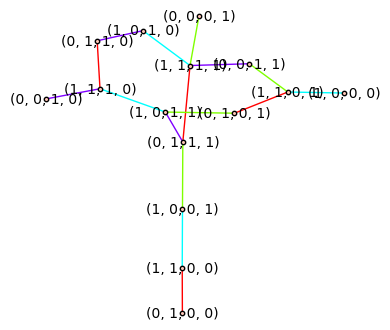

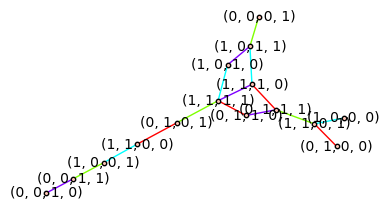

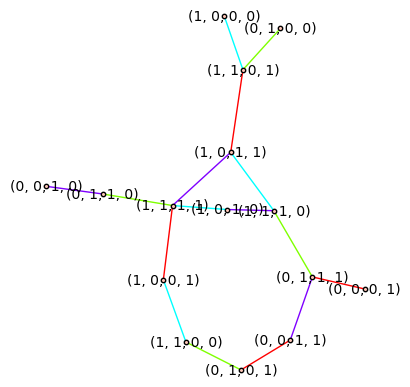

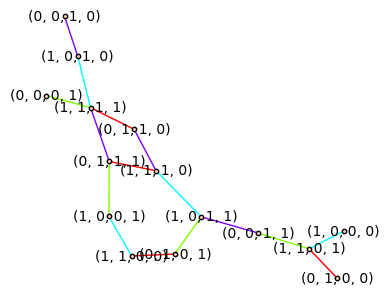

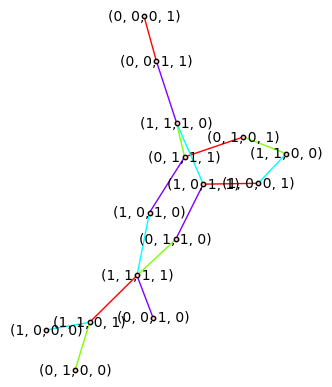

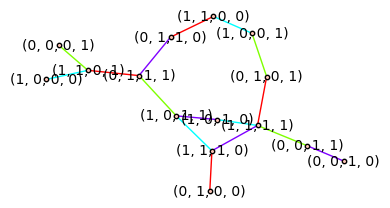

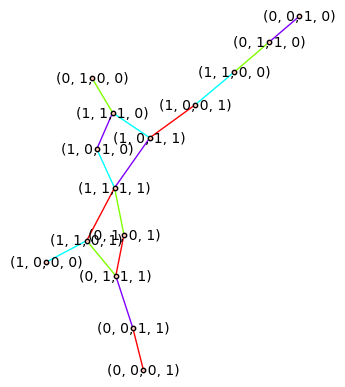

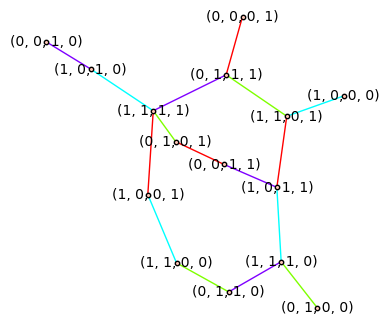

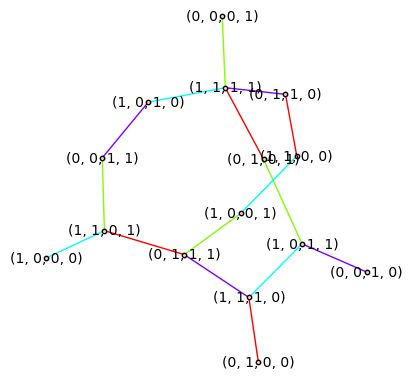

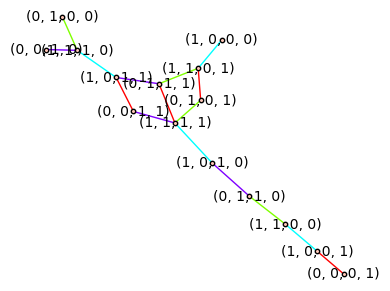

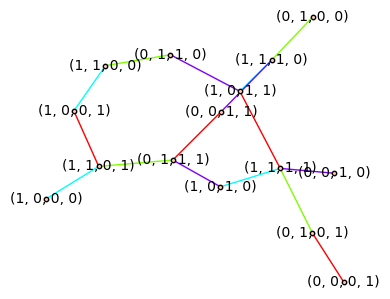

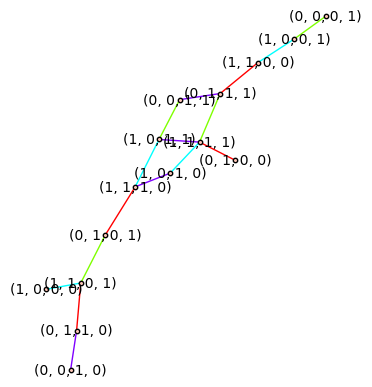

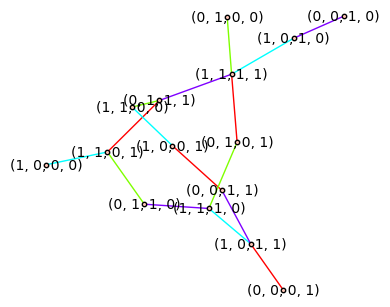

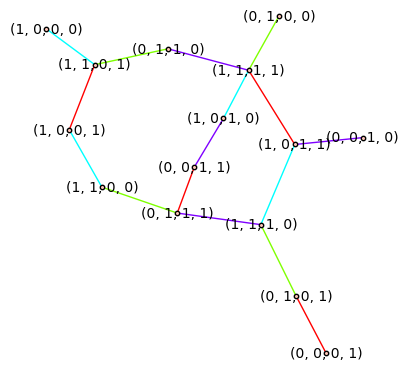

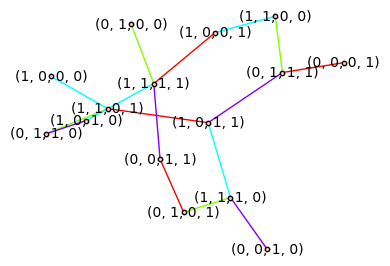

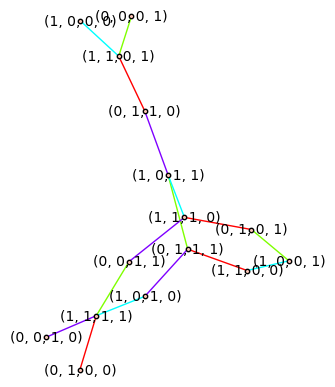

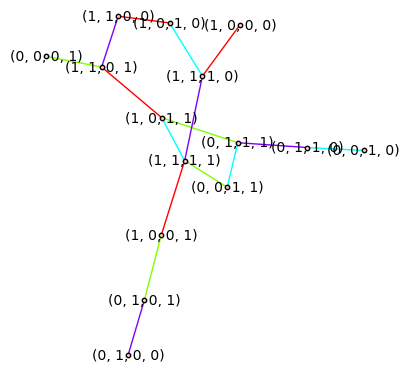

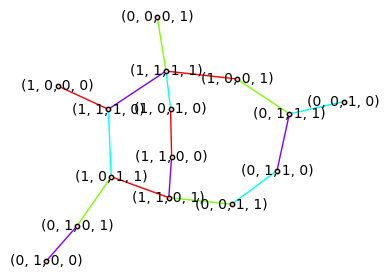

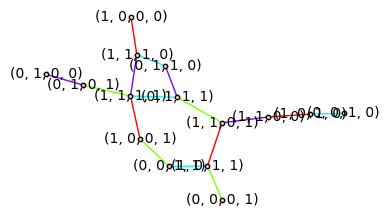

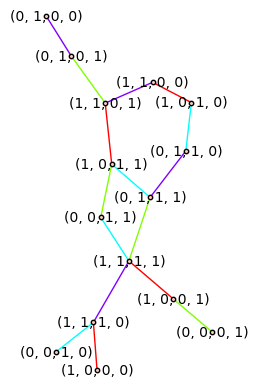

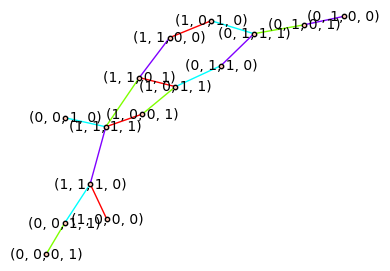

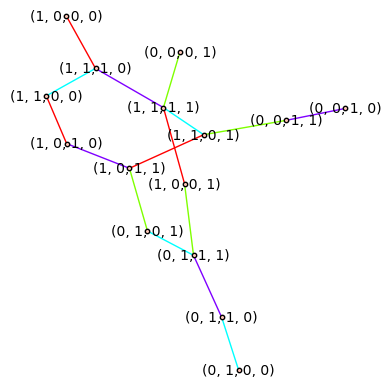

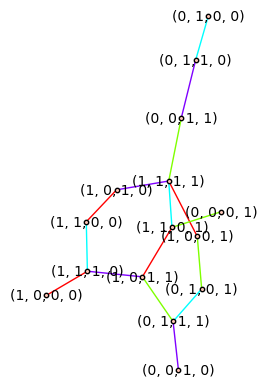

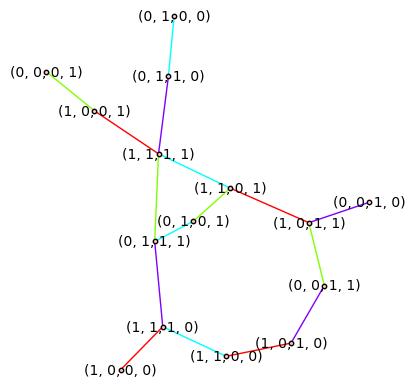

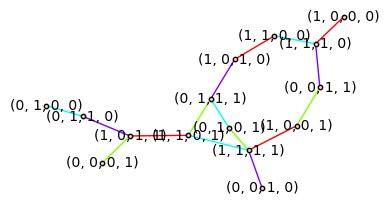

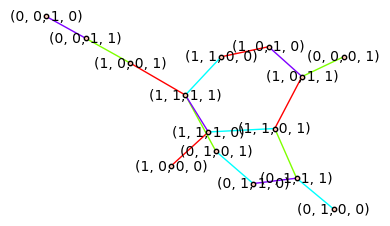

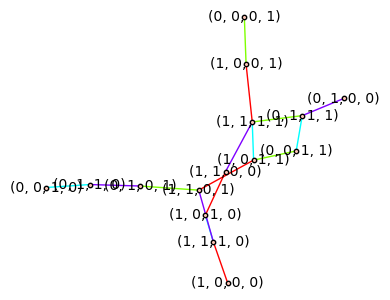

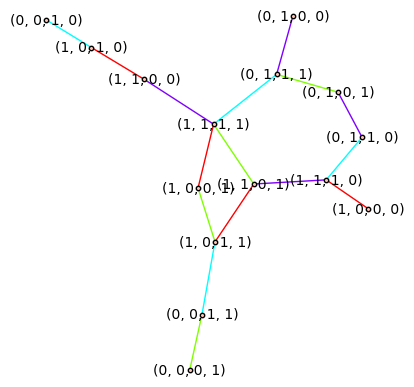

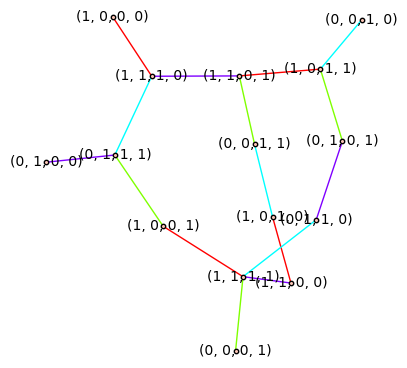

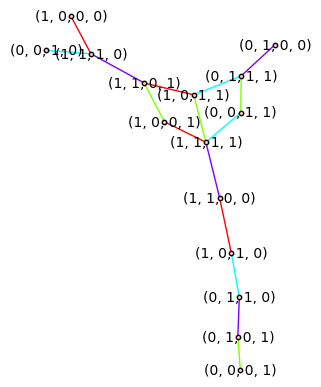

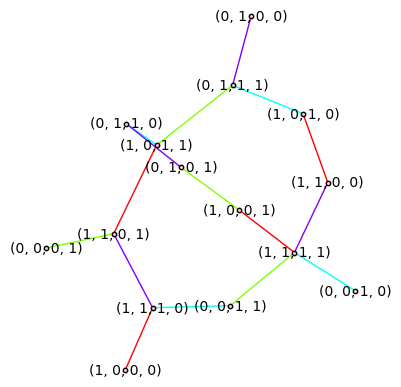

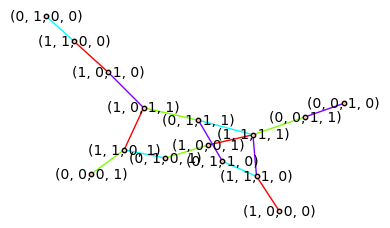

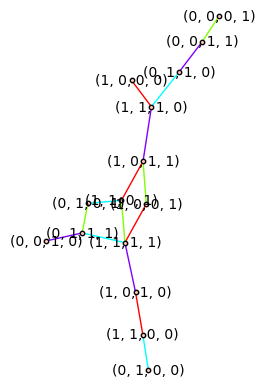

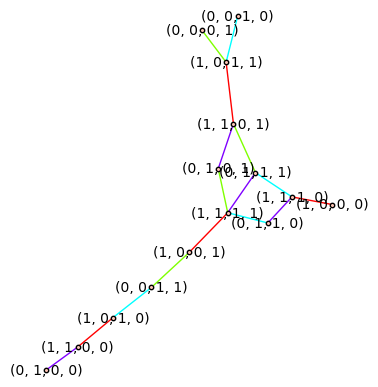

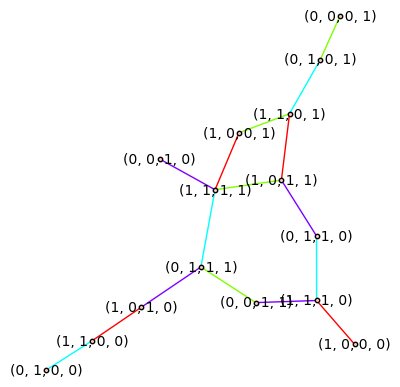

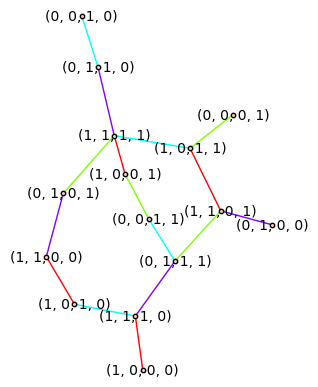

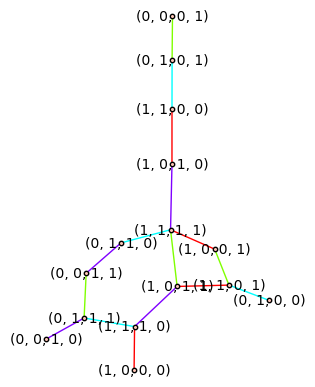

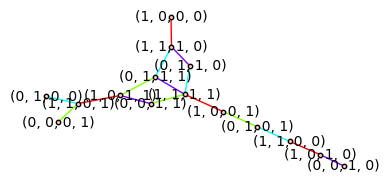

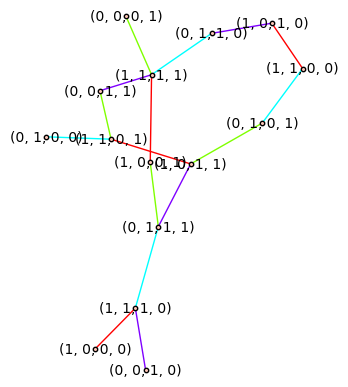

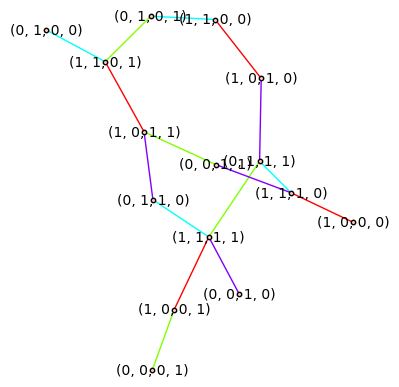

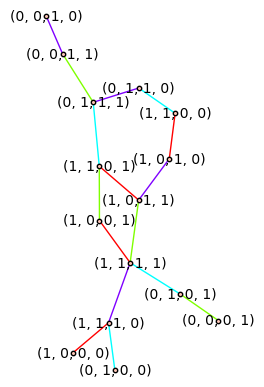

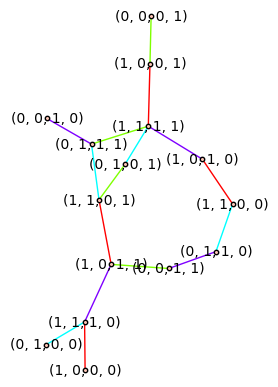

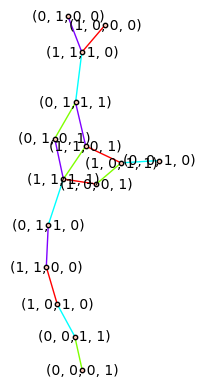

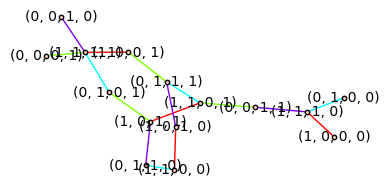

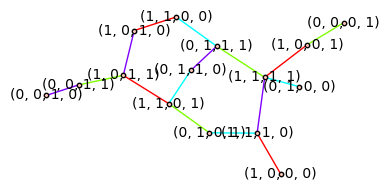

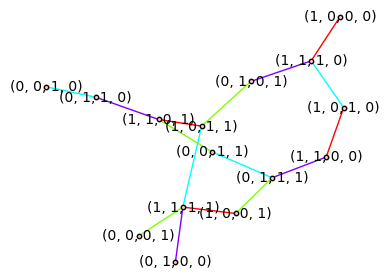

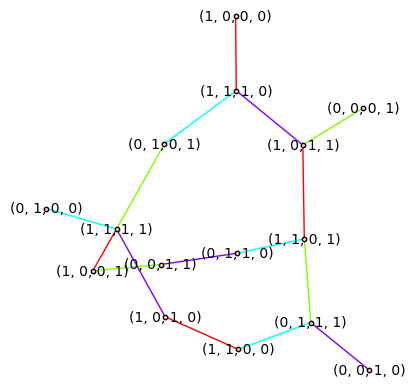

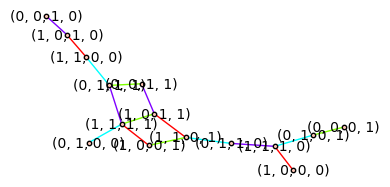

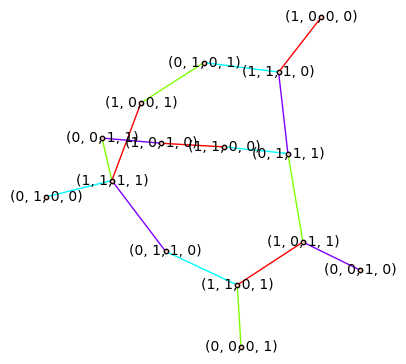

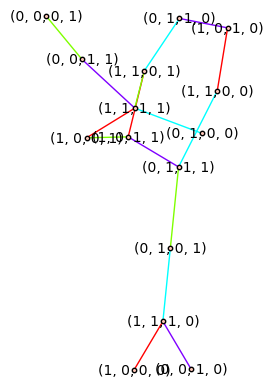

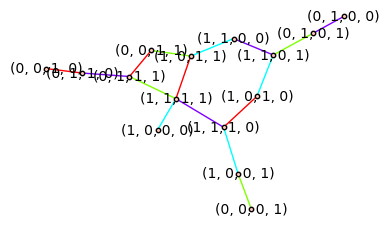

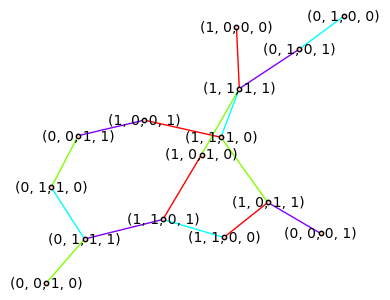

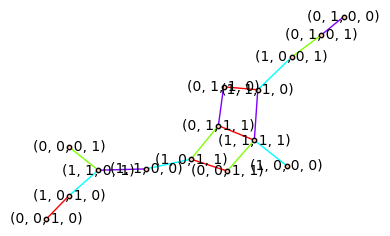

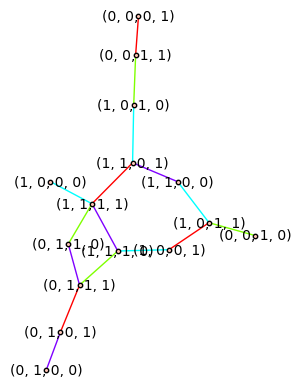

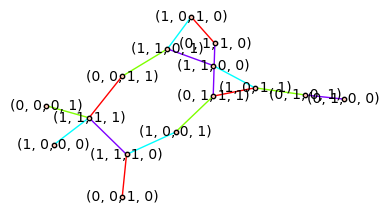

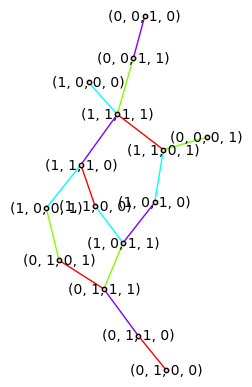

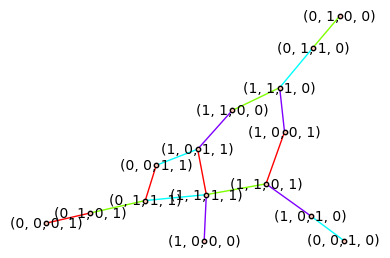

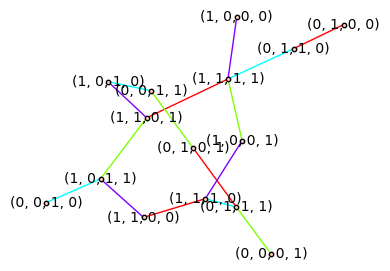

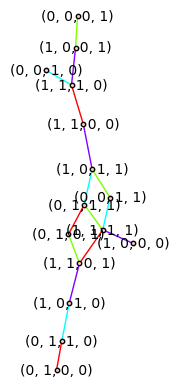

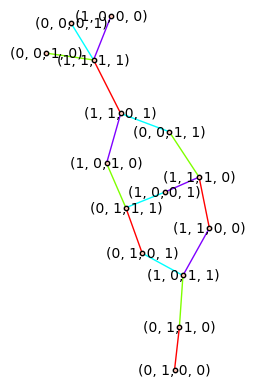

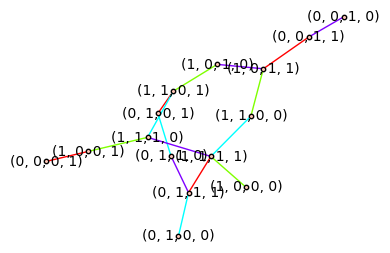

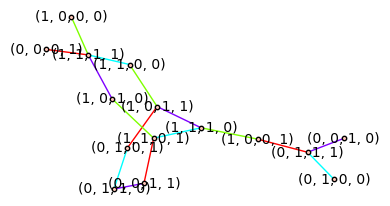

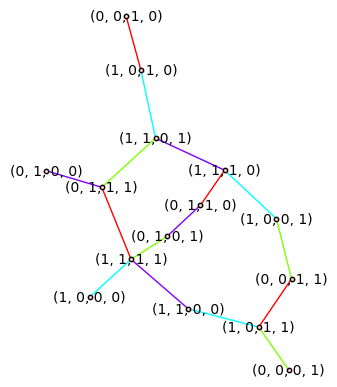

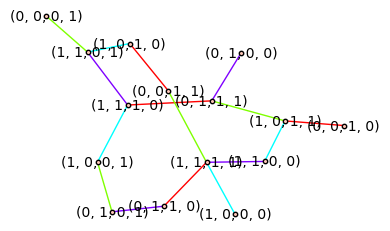

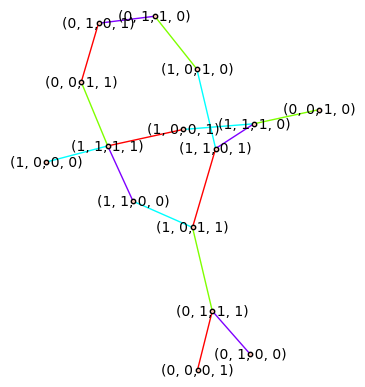

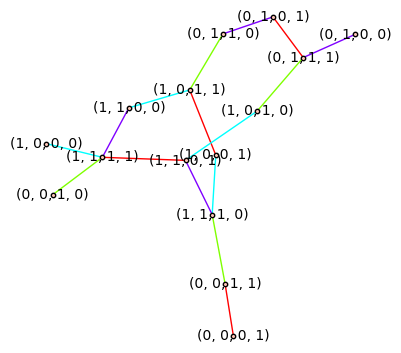

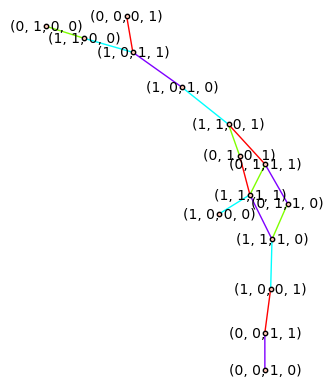

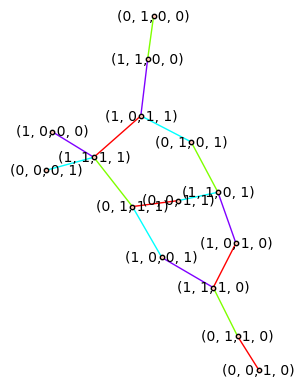

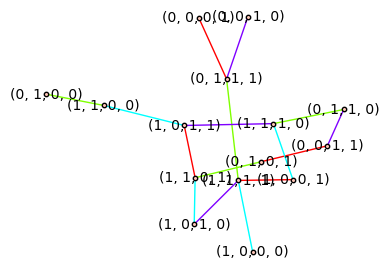

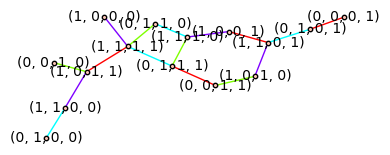

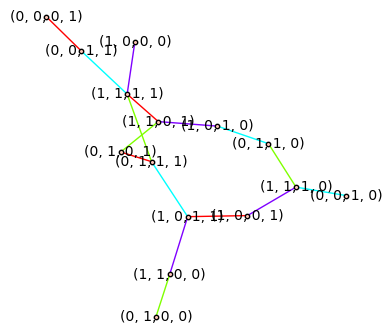

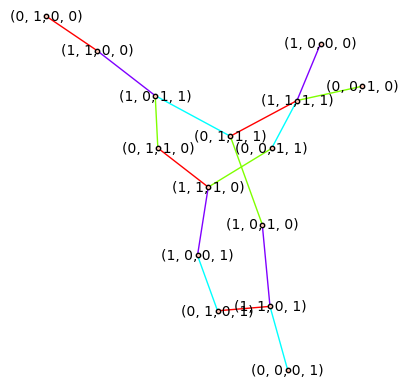

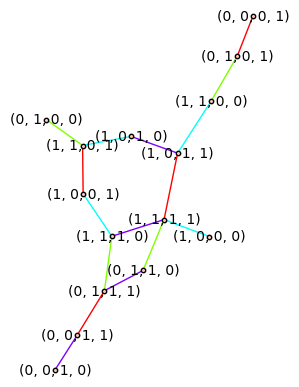

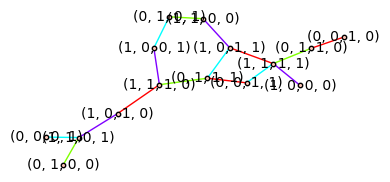

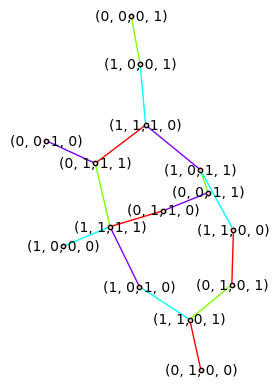

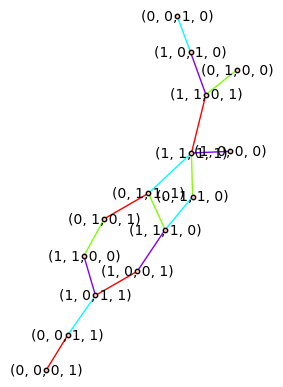

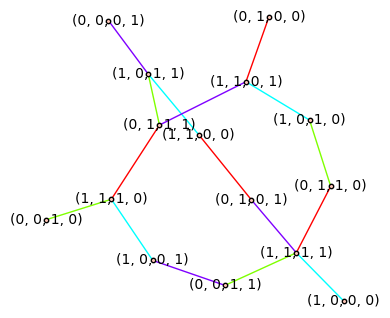

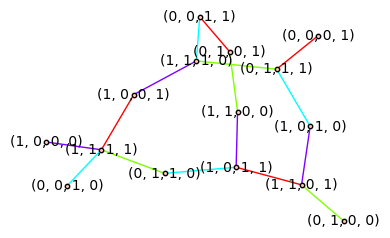

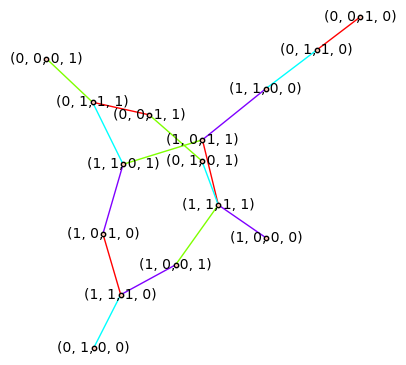

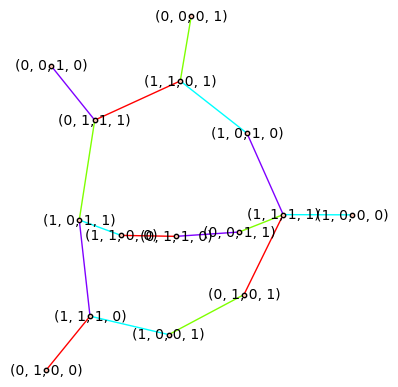

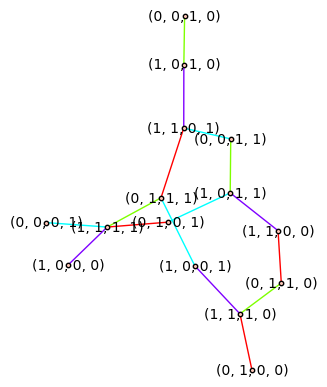

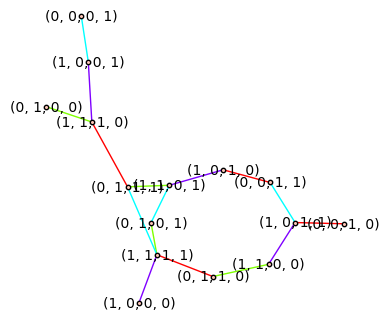

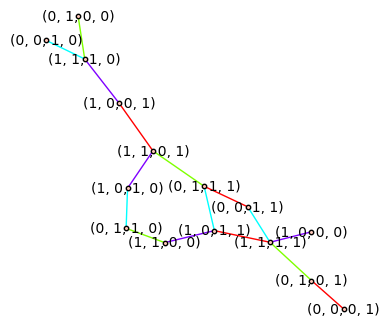

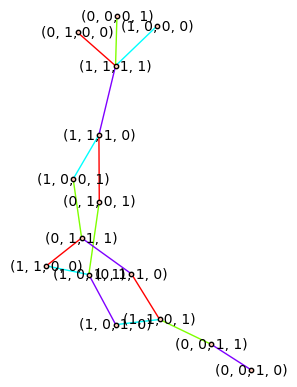

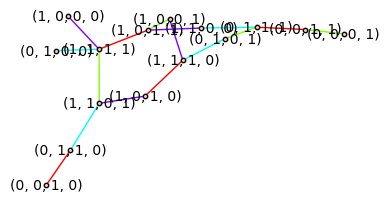

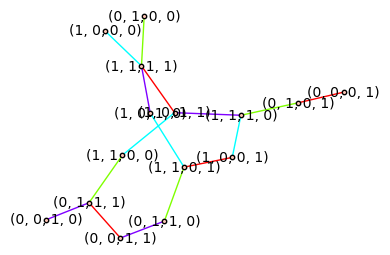

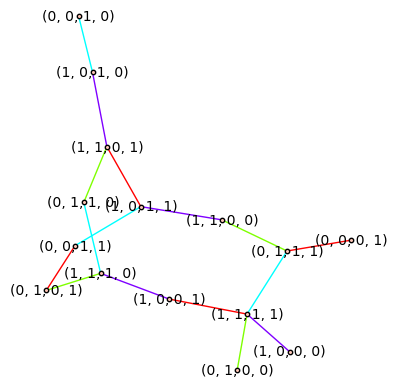

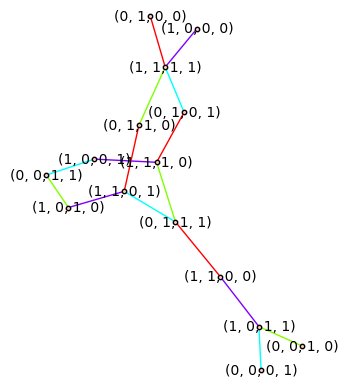

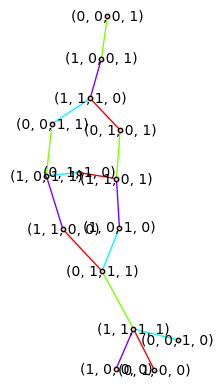

In [13]:
#Play around with the vertex labeling. It can get pretty crazy as n grows.
for r_s in fact_fixed_conj:
    Mlist = get_adj_matrix(r_s)
    #[M1,M2,M3]=get_adj_matrix(rrr[0])
    Dlist= [DiGraph(adj_m) for adj_m in Mlist]
    alledge=[]
    for i in range(n):
        for u,v,l in Dlist[i].edges():
            Dlist[i].set_edge_label(u,v,str(i))
        alledge = alledge+Dlist[i].edges()
    D=DiGraph()
    D.add_edges(alledge)
    D.relabel(vertex)
    G=D.to_undirected()
    #G.delete_vertices([vertex[0],vertex[1],vertex[4]])
    G.graphplot(color_by_label=True,vertex_size=10,layout='spring',vertex_labels=True).show()
    #G.save(str(i).png)


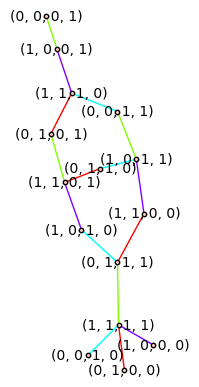

In [14]:
G.graphplot(color_by_label=True,vertex_size=10,layout='spring',vertex_labels=True).show()

In [15]:
holding = G.vertices()
predict = []
labels = list(set(tuple(G.edge_labels())))
for i in range(len(holding)):
    predict.append((holding[i], i+1))
vdict = dict(predict); vdict
blocks = [[] for a in range(len(labels))]; blocks
edict = dict([(labels[i], i) for i in range(len(labels))])
for edge in G.edges():
    blocks[edict[edge[2]]].append((vdict[edge[0]],vdict[edge[1]]))
blocks

[[(6, 1), (10, 2), (8, 3), (11, 4)],
 [(5, 1), (7, 3), (6, 13), (8, 15)],
 [(9, 1), (7, 2), (6, 14), (10, 15)],
 [(12, 1), (2, 13), (14, 3), (4, 15)]]

In [17]:
from coloring_groups import EdgeColoring

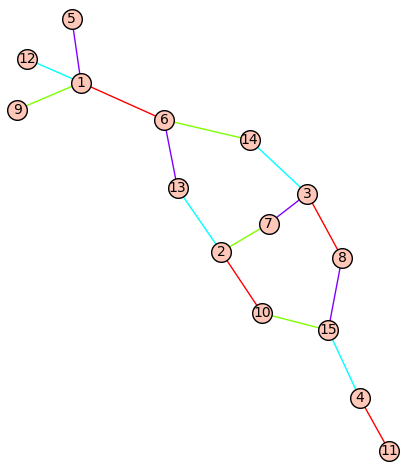

In [18]:
kappa = EdgeColoring(blocks);

kappa.plot()

In [ ]:
absolute_order = kappa.absolute_order();

In [ ]:
cox_elts = list(kappa.coxeter_elements())
intervals = [absolute_order.subposet(absolute_order.order_ideal([elt])) for elt in cox_elts];

print("Coxeter Element | is lattice? | is self-dual? | is isomorphic to intervals[0]?")

for i in range(0, len(intervals)):
    print(cox_elts[i], "|", intervals[i].is_lattice(), "|", intervals[i].is_self_dual(), "|", intervals[i].is_isomorphic(intervals[0]));

In [50]:
G1 = kappa.group();

print(G1.structure_description())

A8


In [20]:
#fact = factorization, c = singer
#returns the cyclic orbit
def cyclic_orbit(fact, c):
    cyclic=[]
    while 1:
        f = fact[-1]
        fact.remove(f)
        fact.insert(0,c*f*c^(-1))
        if fact not in cyclic:
            cyclic.append(copy(fact))
        else:
            break
    return cyclic

In [20]:
for f in fact_g:
    cyc = cyclic_orbit(f,prod(f))
    if len(cyc) == 13:
        thef = f

In [87]:
for new in newlist:
    for rrr in new:    
        symm=[]
        Mlist =get_adj_matrix(rrr)
        for m in Mlist:
            D= DiGraph(m)
            G=D.to_directed()
            #G.show()
            cycle = G.all_simple_cycles()
            #print(edge)
            tup=[]
            for c in cycle:
                newc=[x+1 for x in c[1:]]
                tup.append(tuple(newc))
            #print(tup)
            refl = GG(tup)
            symm.append(refl)
        print(symm,prod(symm))
    print('skip')

[(1,11,8)(3,12,10)(4,13,9), (2,3,4)(6,12,9)(7,10,13), (5,6,7)(8,9,10)(11,12,13)] (1,12,11,9,2,3,10,4,5,6,13,7,8)
[(1,8,11)(3,10,12)(4,9,13), (2,3,4)(6,12,9)(7,10,13), (5,7,6)(8,10,9)(11,13,12)] (1,10,8,13,2,3,12,4,5,7,9,6,11)
[(1,8,11)(3,10,12)(4,9,13), (2,4,3)(6,9,12)(7,13,10), (5,6,7)(8,9,10)(11,12,13)] (1,9,8,12,2,4,13,3,5,6,10,7,11)
[(1,11,8)(3,12,10)(4,13,9), (2,4,3)(6,9,12)(7,13,10), (5,7,6)(8,10,9)(11,13,12)] (1,13,11,10,2,4,9,3,5,7,12,6,8)
skip
[(1,11,8)(3,12,10)(4,13,9), (2,10,9)(3,13,6)(4,7,12), (5,12,10)(6,13,8)(7,11,9)] (1,9,11,6,3,4,13,2,5,12,7,10,8)
[(1,8,11)(3,10,12)(4,9,13), (2,12,13)(3,9,7)(4,6,10), (5,10,12)(6,8,13)(7,9,11)] (1,13,8,7,3,4,9,2,5,10,6,12,11)
[(1,8,11)(3,10,12)(4,9,13), (2,13,12)(3,7,9)(4,10,6), (5,9,13)(6,10,11)(7,8,12)] (1,12,8,6,4,3,10,2,5,9,7,13,11)
[(1,11,8)(3,12,10)(4,13,9), (2,9,10)(3,6,13)(4,12,7), (5,13,9)(6,11,10)(7,12,8)] (1,10,11,7,4,3,12,2,5,13,6,9,8)
skip
[(1,8,11)(3,10,12)(4,9,13), (2,10,9)(3,13,6)(4,7,12), (5,13,9)(6,11,10)(7,12,8)] (1,7,

In [23]:
alledge

[(0, 6, '0'),
 (2, 5, '0'),
 (5, 2, '0'),
 (6, 0, '0'),
 (1, 6, '1'),
 (2, 4, '1'),
 (4, 2, '1'),
 (6, 1, '1'),
 (3, 4, '2'),
 (4, 3, '2'),
 (5, 6, '2'),
 (6, 5, '2')]

In [273]:
for rrr in fact_g:
    [M1,M2,M3]=get_adj_matrix(rrr)
    Dlist=DiGraph(M1),DiGraph(M2),DiGraph(M3)
    alledge=[]
    for i in range(n):
        for u,v,l in Dlist[i].edges():
            Dlist[i].set_edge_label(u,v,str(i))
        alledge = alledge+Dlist[i].edges()
    D=DiGraph()
    D.add_edges(alledge)
    D.relabel(vertex)
    G=D.to_undirected()
    #G.delete_vertices([vertex[0],vertex[1],vertex[4]])
    G.graphplot(color_by_label=True,vertex_size=0,layout='spring').show()
print('skip')

skip


In [144]:
for rrr in fact_g:    
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_directed()
        #G.show()
        cycle = G.all_simple_cycles()
        #print(edge)
        tup=[]
        for c in cycle:
            newc=[x+1 for x in c[1:]]
            tup.append(tuple(newc))
        #print(tup)
        refl = GG(tup)
        symm.append(refl)
    print(symm,prod(symm))

[(1,6)(3,7), (2,3)(5,7), (4,5)(6,7)] (1,7,2,3,4,5,6)
[(1,6)(3,7), (2,7)(3,5), (4,7)(5,6)] (1,5,3,2,4,7,6)
[(1,3)(6,7), (2,5)(3,7), (4,7)(5,6)] (1,4,7,5,2,6,3)
[(1,3)(6,7), (2,7)(3,5), (4,6)(5,7)] (1,7,4,6,2,5,3)
[(1,7)(3,6), (2,5)(3,7), (4,6)(5,7)] (1,3,4,6,5,2,7)
[(1,7)(3,6), (2,3)(5,7), (4,7)(5,6)] (1,6,2,3,5,4,7)
[(1,7)(3,6), (2,7)(3,5), (4,5)(6,7)] (1,2,6,4,5,3,7)


In [279]:
str(5)

'5'

In [56]:

for new in newlist:
    for rrr in new:    
        symm=[]
        Mlist =get_adj_matrix(rrr)
        for m in Mlist:
            D= DiGraph(m)
            G=D.to_directed()
            #G.show()
            cycle = G.all_simple_cycles()
            #print(edge)
            tup=[]
            for c in cycle:
                newc=[x+1 for x in c[1:]]
                tup.append(tuple(newc))
            #print(tup)
            refl = GG(tup)
            symm.append(refl)
        print(symm,prod(symm))
    print('skip')

[(1,11,8)(3,12,10)(4,13,9), (2,3,4)(6,12,9)(7,10,13), (5,6,7)(8,9,10)(11,12,13)] (1,12,11,9,2,3,10,4,5,6,13,7,8)
[(1,8,11)(3,10,12)(4,9,13), (2,3,4)(6,12,9)(7,10,13), (5,7,6)(8,10,9)(11,13,12)] (1,10,8,13,2,3,12,4,5,7,9,6,11)
[(1,8,11)(3,10,12)(4,9,13), (2,4,3)(6,9,12)(7,13,10), (5,6,7)(8,9,10)(11,12,13)] (1,9,8,12,2,4,13,3,5,6,10,7,11)
[(1,11,8)(3,12,10)(4,13,9), (2,4,3)(6,9,12)(7,13,10), (5,7,6)(8,10,9)(11,13,12)] (1,13,11,10,2,4,9,3,5,7,12,6,8)
skip
[(1,11,8)(3,12,10)(4,13,9), (2,10,9)(3,13,6)(4,7,12), (5,12,10)(6,13,8)(7,11,9)] (1,9,11,6,3,4,13,2,5,12,7,10,8)
[(1,8,11)(3,10,12)(4,9,13), (2,12,13)(3,9,7)(4,6,10), (5,10,12)(6,8,13)(7,9,11)] (1,13,8,7,3,4,9,2,5,10,6,12,11)
[(1,8,11)(3,10,12)(4,9,13), (2,13,12)(3,7,9)(4,10,6), (5,9,13)(6,10,11)(7,8,12)] (1,12,8,6,4,3,10,2,5,9,7,13,11)
[(1,11,8)(3,12,10)(4,13,9), (2,9,10)(3,6,13)(4,12,7), (5,13,9)(6,11,10)(7,12,8)] (1,10,11,7,4,3,12,2,5,13,6,9,8)
skip
[(1,8,11)(3,10,12)(4,9,13), (2,10,9)(3,13,6)(4,7,12), (5,13,9)(6,11,10)(7,12,8)] (1,7,

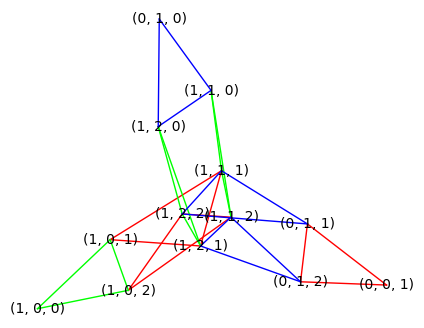

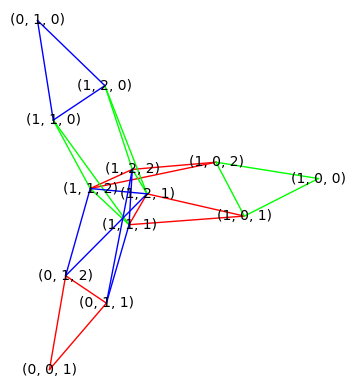

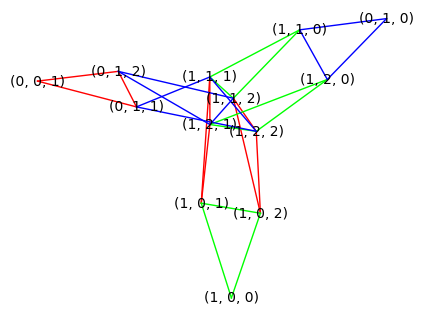

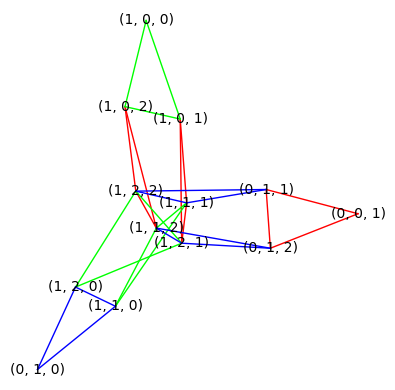

skip


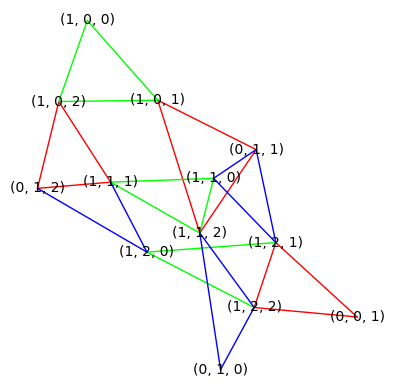

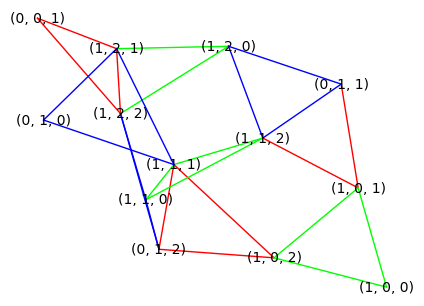

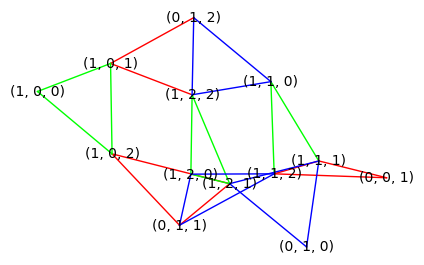

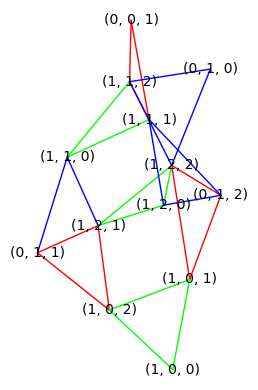

skip


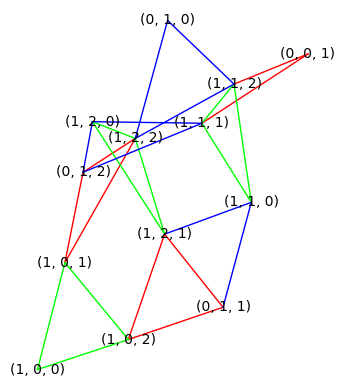

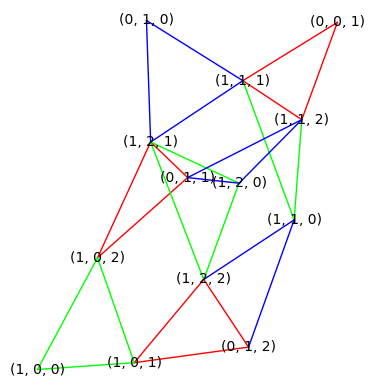

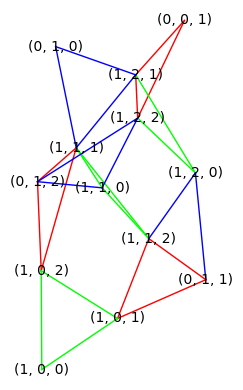

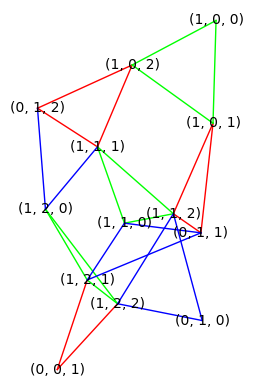

skip


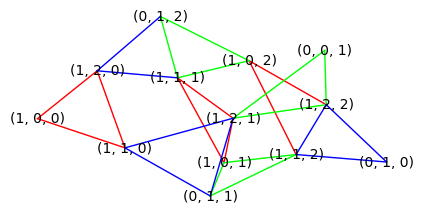

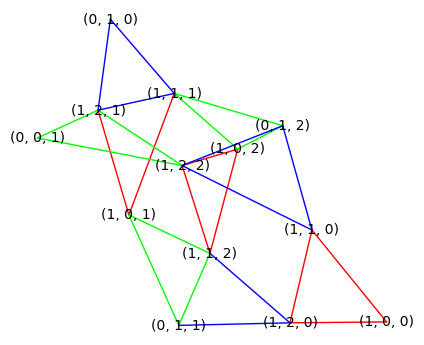

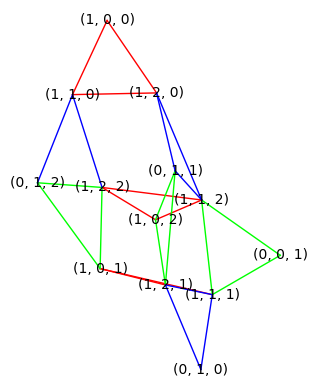

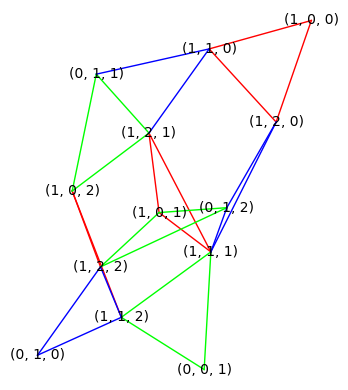

skip


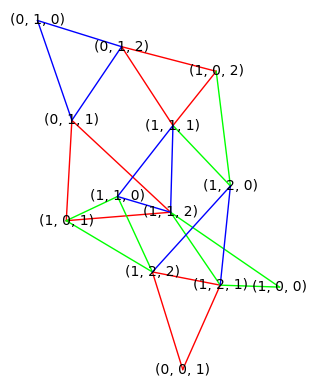

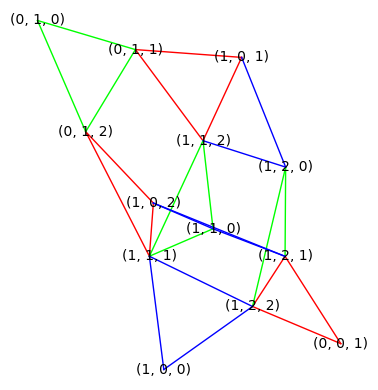

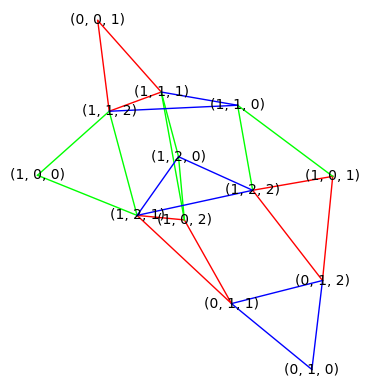

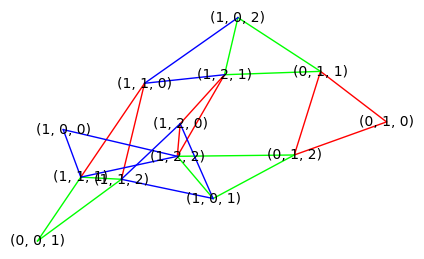

skip


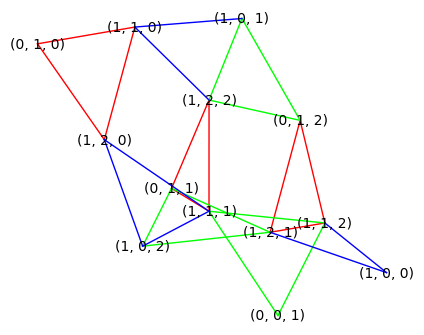

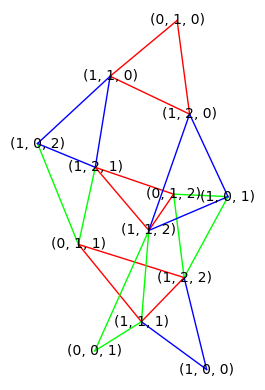

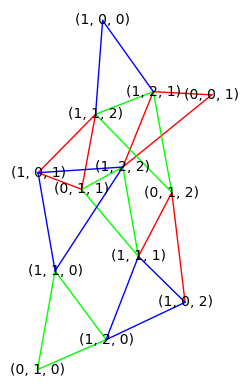

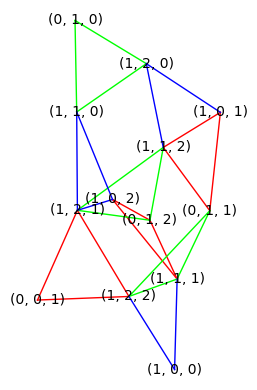

skip


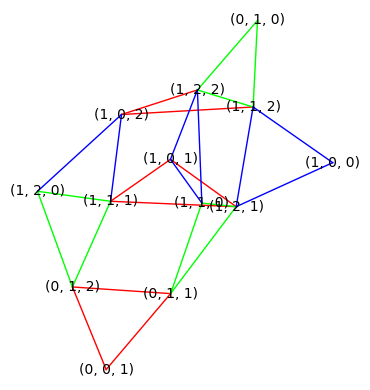

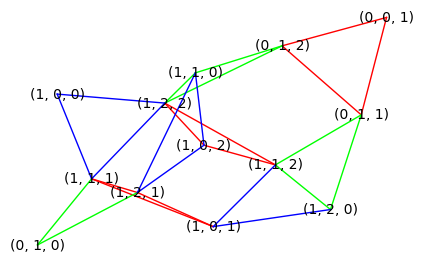

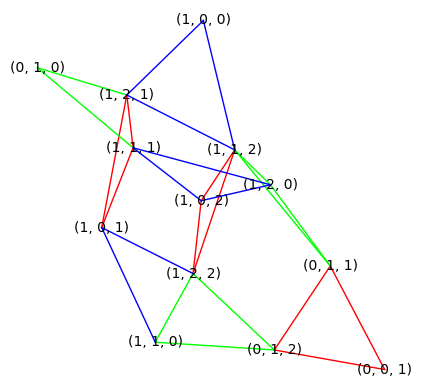

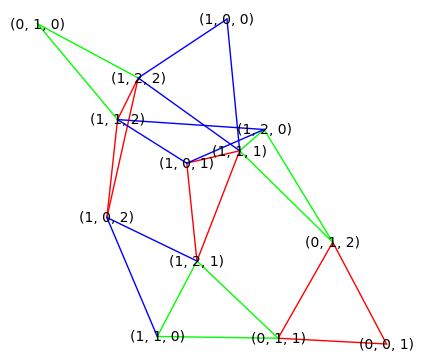

skip


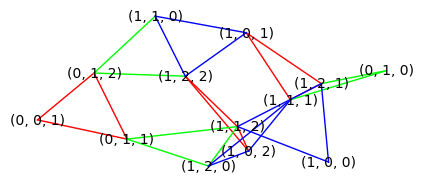

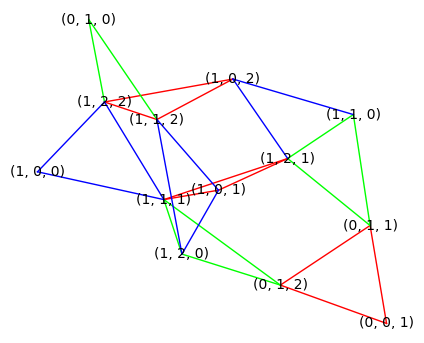

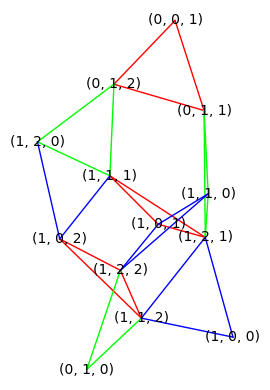

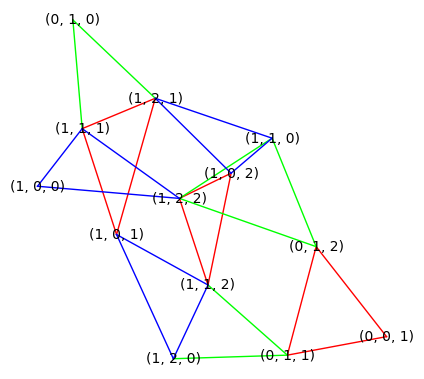

skip


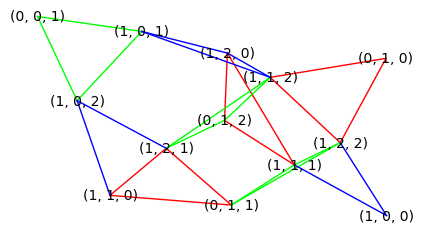

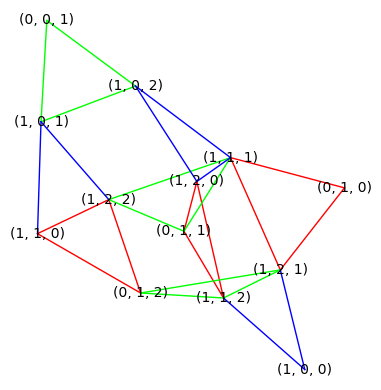

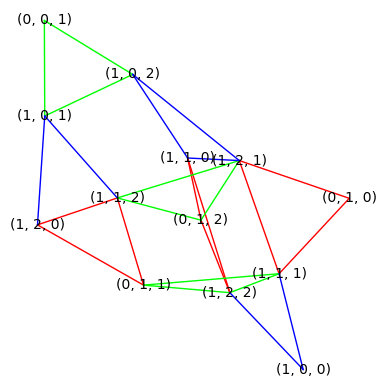

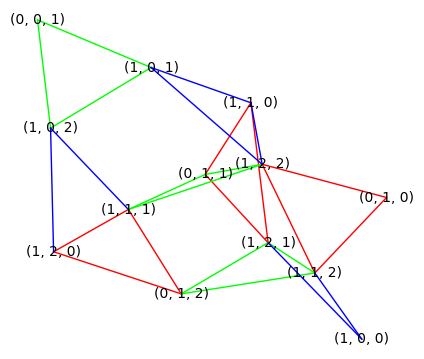

skip


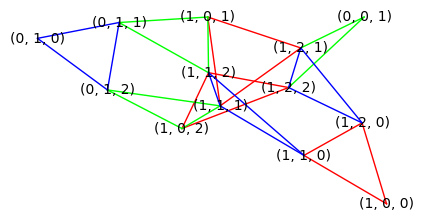

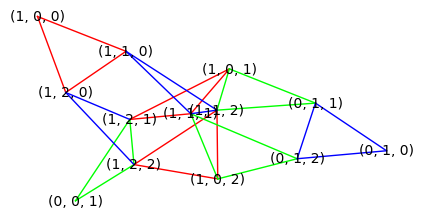

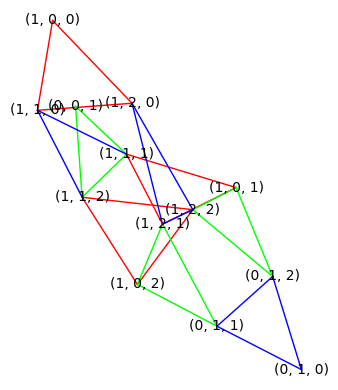

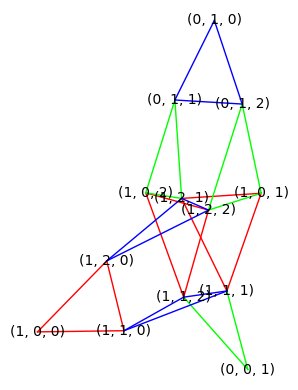

skip


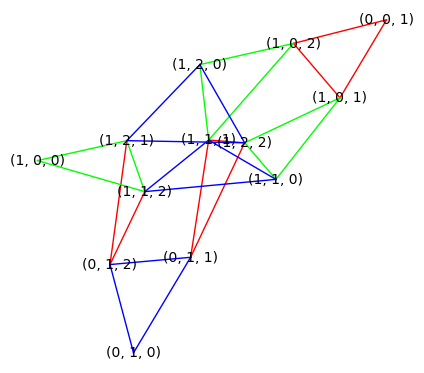

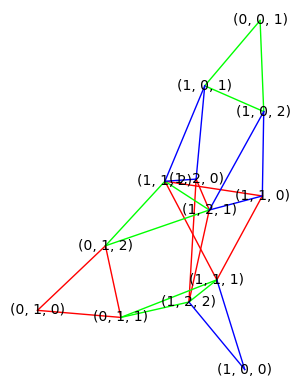

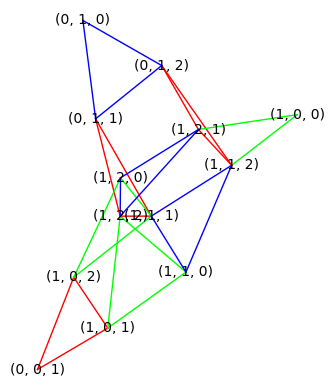

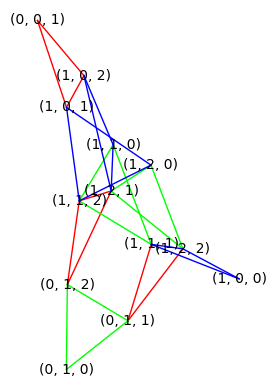

skip


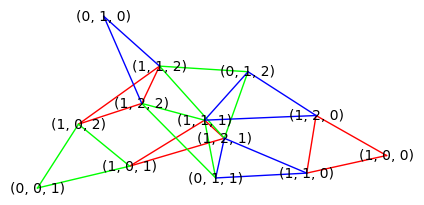

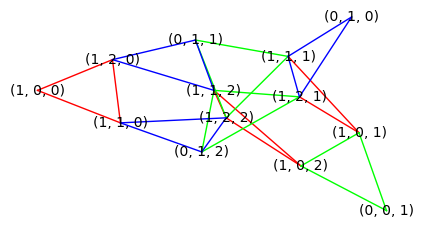

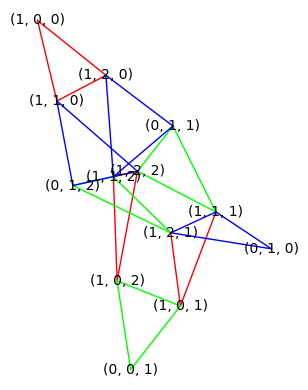

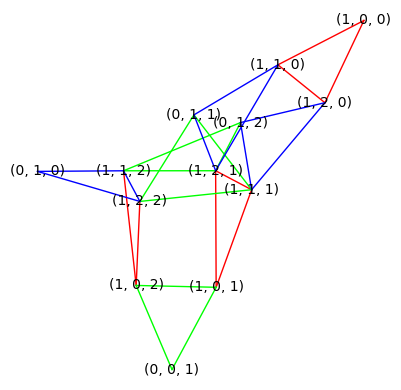

skip


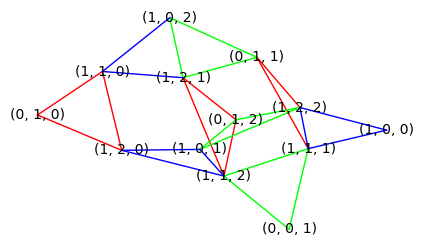

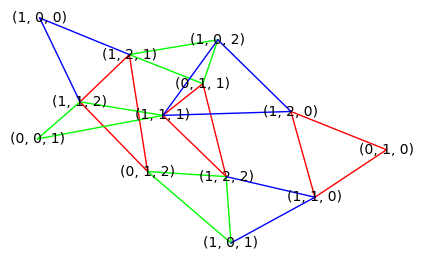

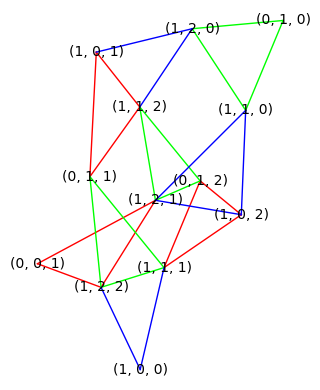

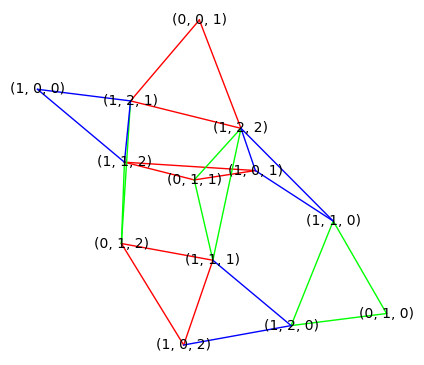

skip


In [23]:
for new in newlist: 
    for rrr in new:
        [M1,M2,M3]=get_adj_matrix(rrr)
        Dlist=DiGraph(M1),DiGraph(M2),DiGraph(M3)
        alledge=[]
        for i in range(n):
            for u,v,l in Dlist[i].edges():
                Dlist[i].set_edge_label(u,v,str(i))
            alledge = alledge+Dlist[i].edges()
        D=DiGraph()
        D.add_edges(alledge)
        D.relabel(vertex)
        G=D.to_undirected()
        #G.delete_vertices([vertex[0],vertex[1],vertex[4]])
        G.graphplot(color_by_label=True,vertex_size=0,layout='spring').show()
    print('skip')

In [55]:
def labeled_tree2fact(ep):
    return [(e[0]+1,e[1]+1) for e in ep]

GG=SymmetricGroup(nq)

In [52]:
def is_reflection(g):
    n = G.degree()
    M = g.matrix() - (G[0]^0).matrix()
    KM = M.kernel()
    return KM.dimension() == n-1

def is_transvection(g):
    return is_reflection(g) and M(g).determinant() == 1


def get_transvections(): #find all transvection in a list
    R = []
    for g in G:
        if is_transvection(g):
            R.append(g)
    return R

def get_refls(): #find all reflections in a list
    R = []
    for g in G:
        if is_reflection(g):
            R.append(g)
    return R
def get_fact(R,c):#given a list of reflections and a singer cycle returns the list of factorization in reflections
    F = []
    for i in product(range(len(R)),repeat = G.degree()):
        if mul([R[i[k]] for k in range(G.degree())]) == c:
            F.append([R[i[k]] for k in range(G.degree())])
    return F

In [59]:
R=get_refls()
fact1=get_fact(R,sing[0])

In [60]:
len(fact1)

49

In [132]:
#for new in fact_g:
    #print('space')
for rrr in fact1:  
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_undirected()
        edge = labeled_tree2fact(G.edges())
        refl = GG(edge)
        symm.append(refl)
    print(symm,prod(symm))

[(1,4)(2,7), (1,6)(3,4), (4,5)(6,7)] (1,3,5,4,7,2,6)
[(1,4)(2,7), (1,7)(3,5), (1,6)(3,4)] (1,3,5,4,7,2,6)
[(1,4)(2,7), (4,5)(6,7), (1,7)(3,5)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (1,4)(2,7), (1,6)(3,4)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (1,6)(3,4), (2,7)(3,6)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (2,7)(3,6), (1,3)(4,6)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (1,3)(4,6), (1,4)(2,7)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (2,6)(3,7), (2,3)(4,5)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (2,7)(3,6), (4,5)(6,7)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (4,5)(6,7), (2,6)(3,7)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (2,3)(4,5), (2,7)(3,6)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (1,6)(2,5), (4,7)(5,6)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (1,5)(2,6), (1,2)(4,7)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (1,2)(4,7), (1,6)(2,5)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (4,7)(5,6), (1,5)(2,6)] (1,3,5,4,7,2,6)
[(1,7)(3,5), (1,6)(3,4), (2,6)(3,7)] (1,3,5,4,7,2,6)
[(1,7)(3,5), (2,6)(3,7), (1,2)(4,7)] (1,3,5,4,7,2,6)
[(1,7)(3,5), (1,2)(4,7), (1,6)(3,4)] (1,3,5,4,7,2,6)
[(1,6)(2,5), (2,4)(3,5), (2,7)(3,6)] (1,3,5,4,

In [83]:
vertex

{0: '(1, 0, 0)',
 1: '(0, 1, 0)',
 2: '(1, 2, 0)',
 3: '(1, 1, 0)',
 4: '(0, 0, 1)',
 5: '(0, 1, 2)',
 6: '(0, 1, 1)',
 7: '(1, 0, 2)',
 8: '(1, 1, 2)',
 9: '(1, 2, 2)',
 10: '(1, 0, 1)',
 11: '(1, 2, 1)',
 12: '(1, 1, 1)'}

In [51]:
#for new in fact_g:
    #print('space')
for rrr in fact_g:  
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_undirected()
        edge = labeled_tree2fact(G.edges())
        refl = GG(edge[1:4])
        symm.append(refl)
    print(symm,prod(symm))

[(3,9)(4,10)(12,13), (6,10)(7,12)(9,13), (6,8)(7,10)(11,12)] (3,13,10,4,8,6,7,11,12,9)
[(3,9)(4,10)(12,13), (3,6)(4,9)(7,10), (8,12)(9,11)(10,13)] (3,4,7,13,8,12,10,11,9,6)
[(3,9)(4,10)(12,13), (3,7)(4,13)(6,12), (6,11)(7,13)(8,9)] (3,8,9,13,11,6,12,4,10,7)
[(3,9)(4,10)(12,13), (6,13)(7,9)(10,12), (6,9)(7,8)(11,13)] (3,8,7,6,11,13,10,4,12,9)
[(3,9)(4,10)(12,13), (3,12)(4,6)(7,13), (6,12)(7,11)(8,10)] (3,9,6,4,8,10,12,11,7,13)
[(3,9)(4,10)(12,13), (3,10)(4,7)(6,9), (8,13)(9,12)(10,11)] (3,6,12,8,13,9,11,10,7,4)
[(3,13)(4,12)(9,10), (6,10)(7,12)(9,13), (6,12)(7,11)(8,10)] (3,9,12,4,11,7,6,8,10,13)
[(3,13)(4,12)(9,10), (3,6)(4,9)(7,10), (6,9)(7,8)(11,13)] (3,11,13,9,8,7,10,4,12,6)
[(3,13)(4,12)(9,10), (3,7)(4,13)(6,12), (8,13)(9,12)(10,11)] (3,4,6,9,11,10,12,8,13,7)
[(3,13)(4,12)(9,10), (6,13)(7,9)(10,12), (6,11)(7,13)(8,9)] (3,11,6,7,8,9,12,4,10,13)
[(3,13)(4,12)(9,10), (3,12)(4,6)(7,13), (8,12)(9,11)(10,13)] (3,7,10,11,9,13,8,12,6,4)
[(3,13)(4,12)(9,10), (3,10)(4,7)(6,9), (6,8)(7,10)(11

In [145]:
fact_g[1],prod(fact_g[1])

(
[[1 0 1]                 
[0 1 0]                  
[0 0 1], [1 0 0]         
[1 1 1]                  
[0 0 1], [1 0 0]  [1 1 1]
[0 1 0]           [1 0 1]
[0 1 1]]        , [0 1 1]
)

In [104]:
#for new in fact_g:
    #print('space')
for rrr in fact_g:  
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_undirected()
        edge = labeled_tree2fact(G.edges())
        refl = GG(edge)
        symm.append(refl)
    print(symm,prod(symm))

[(4,5)(6,7), (2,6)(3,7), (1,7)(3,5)] (1,7,2,6,5,4,3)
[(4,5)(6,7), (2,7)(3,6), (1,3)(5,7)] (1,3,6,2,5,4,7)
[(4,6)(5,7), (2,3)(6,7), (1,5)(3,7)] (1,5,6,4,3,2,7)
[(4,6)(5,7), (2,7)(3,6), (1,7)(3,5)] (1,7,3,6,4,5,2)
[(4,7)(5,6), (2,3)(6,7), (1,7)(3,5)] (1,7,4,6,3,2,5)
[(4,7)(5,6), (2,6)(3,7), (1,3)(5,7)] (1,3,5,2,6,7,4)
[(4,7)(5,6), (2,7)(3,6), (1,5)(3,7)] (1,5,7,4,2,3,6)
